<a href="https://colab.research.google.com/github/G0kc3/Aygaz/blob/main/GlobalAIHub_GokceCinar_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Neccesary Packages


In [ ]:
pip install scikit-learn

#Importing Libraries & determining general features

Importing Pandas, NumPy, Seaborn, Matplotlib and Sklearn libraries for data analysis.

In [84]:
import numpy as np #one of the base libraries
import pandas as pd #one of the base libraries
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt #data visualization/plotting like MATLAB
from scipy import stats #sub-package of all statistics functions in a scientific computing package scipy
import sklearn as skl #machine learning library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.metrics import explained_variance_score,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

#from sklearn.model_selection import train_test_split
#from sklearn import linear_model

##General plot features

In [ ]:
plt.rcParams['figure.figsize'] = [15,12]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-dark-palette')

<ipython-input-3-d0c354673f29>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


# Importing data


## Uploading manually


Download the data set from : https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

Upload it to this session by files on the left menu.

In [104]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Upload it from your drive

### Global variables for uploading

In [ ]:
dfname = 'insurance' #csv file's name
where_is_it = 'drive' # drive or local

### Connecting to the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Importing data

In [ ]:
# importing data
if (where_is_it == 'drive') :
  df = pd.read_csv('/content/drive/MyDrive/'+str(dfname)+r'.csv', encoding='utf-8', error_bad_lines=False)
else:
  df = pd.read_csv('./'+str(dfname)+r'.csv', encoding='utf-8', error_bad_lines=False)


# Analyzing data

###Check the spesfics like null numbers, data types & statistics

In [ ]:
df.info() # to check null numbers & datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


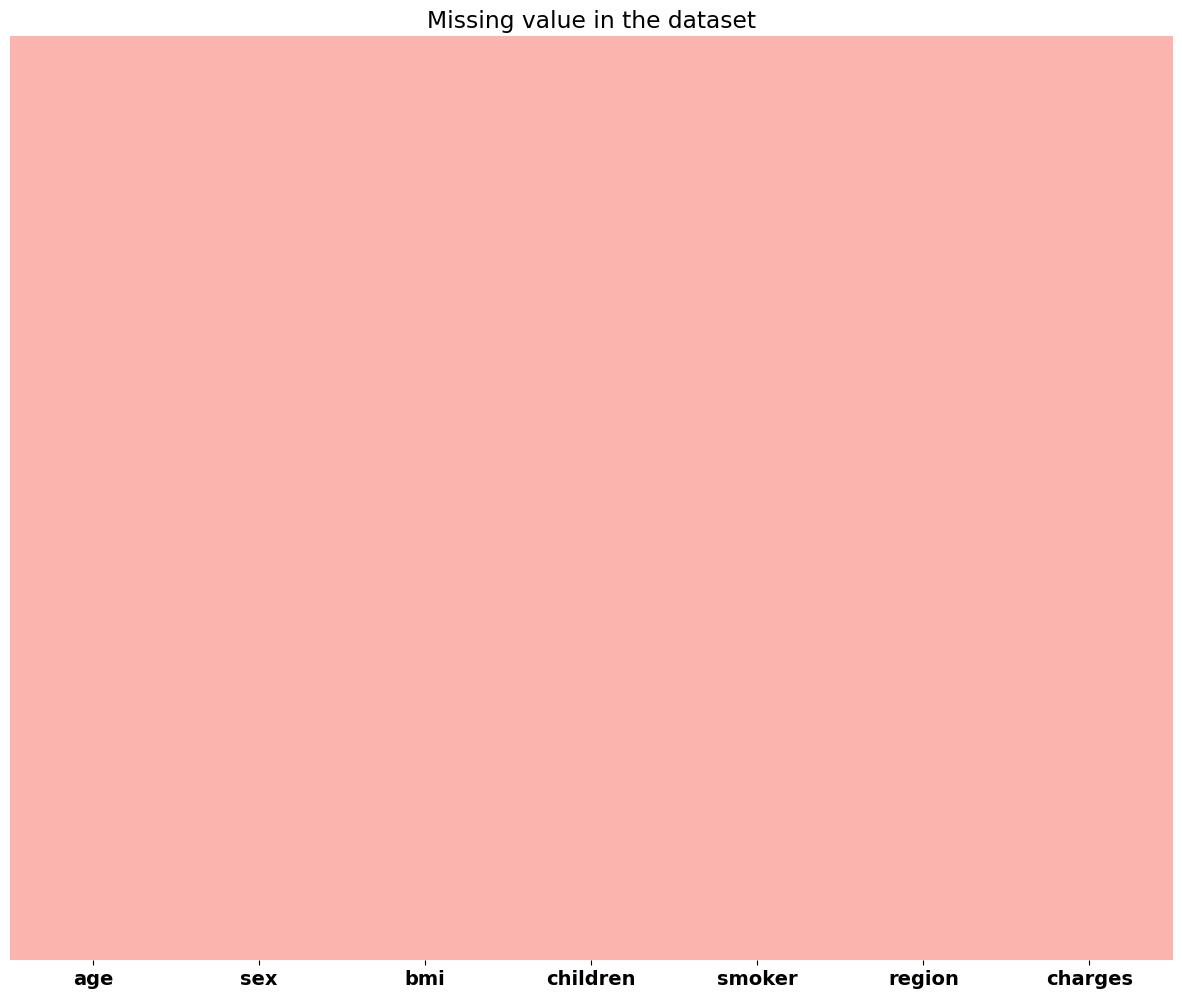

In [ ]:
#We can see there isn't any missing values in this data, but we can show it also visually. (second way to check)
sns.heatmap(df.isnull(),cbar=False,cmap='Pastel1',yticklabels=False)
plt.title('Missing value in the dataset');

In [ ]:
#df.isnull().sum() #Are there any missing values? (third way to check)
#df.dtypes #what data types do we have? Types are important to choose right methods. (second way to check)

In [ ]:
df.describe() #statistical values of the data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Unique values

If we need unique values for each column, we can use "unique()" to find out them.

In [ ]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [ ]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

### Exploratory Data Analysis

We can learn from info() funciton in this data, some values are categorical & some of them are numerical.
We can talk about distribution of data by looking at the result obtained from describe() function.

Like minimum & maximum values, the shape of the data, standart deviation etc.

On the other hand, with exploratory data analysis we can also look relationship of the variables.

For example, if we want to check the corralation of the variables we could use corr() function between the variables one by one or we can visualize whole correlation table as such;


<ipython-input-6-84ed7c3f2f8f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


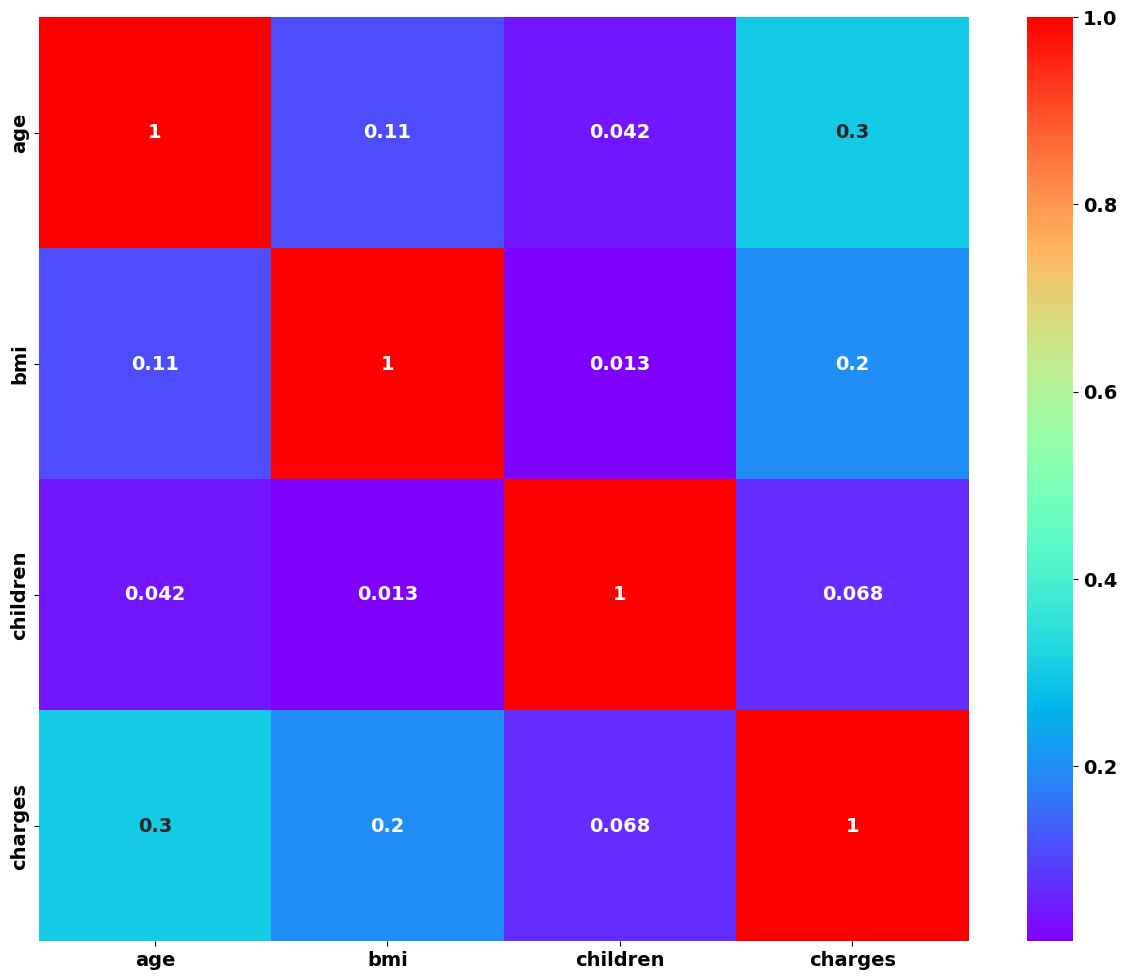

In [ ]:
# correlation plot of the variables
corr = df.corr()
sns.heatmap(corr, cmap = 'rainbow', annot= True);

From this table we can check all the corralation values at the same time.

If we want to observe the relationship of two or more variables, to decide on the chart to use, we must consider the data types and what we want to learn.

For example, the violin chart can be used to see if there is a difference in the amount of charges between smokers and non-smokers.

<Axes: xlabel='smoker', ylabel='charges'>

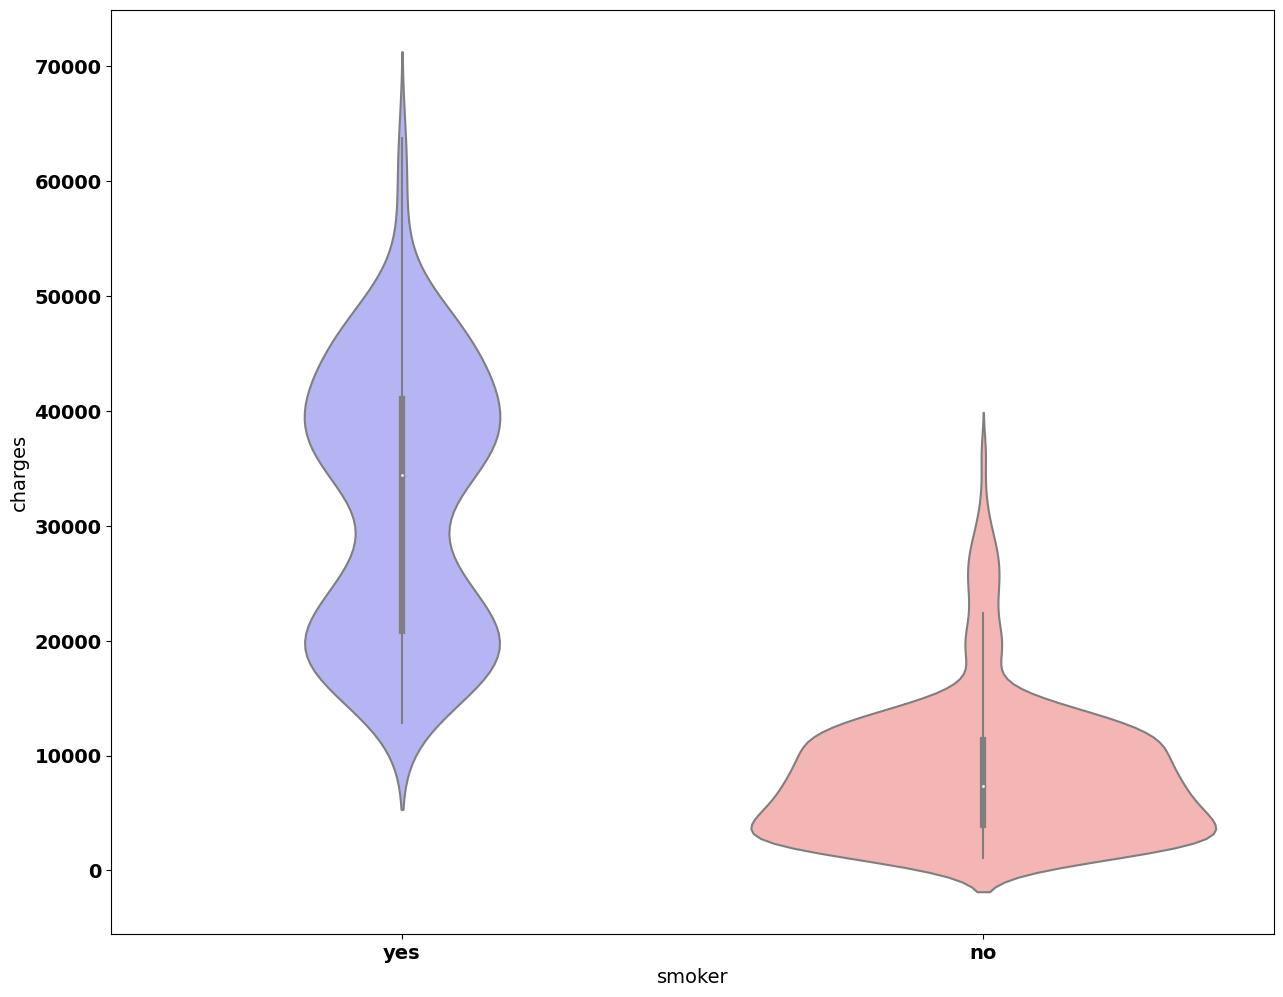

In [ ]:
# Examine the relationship between “smoker” and “charges”
## Violin plot of Charges vs smoker

sns.violinplot(x='smoker', y='charges',data=df,palette='bwr')

The insurance charge for smokers is wider range compare to non smokers. The lowest charge for a smoker is around 5000, while for a non-smoker this is the average.

But we can also choose other suitable graphs to explore the situation, like boxplot;

<Axes: xlabel='smoker', ylabel='charges'>

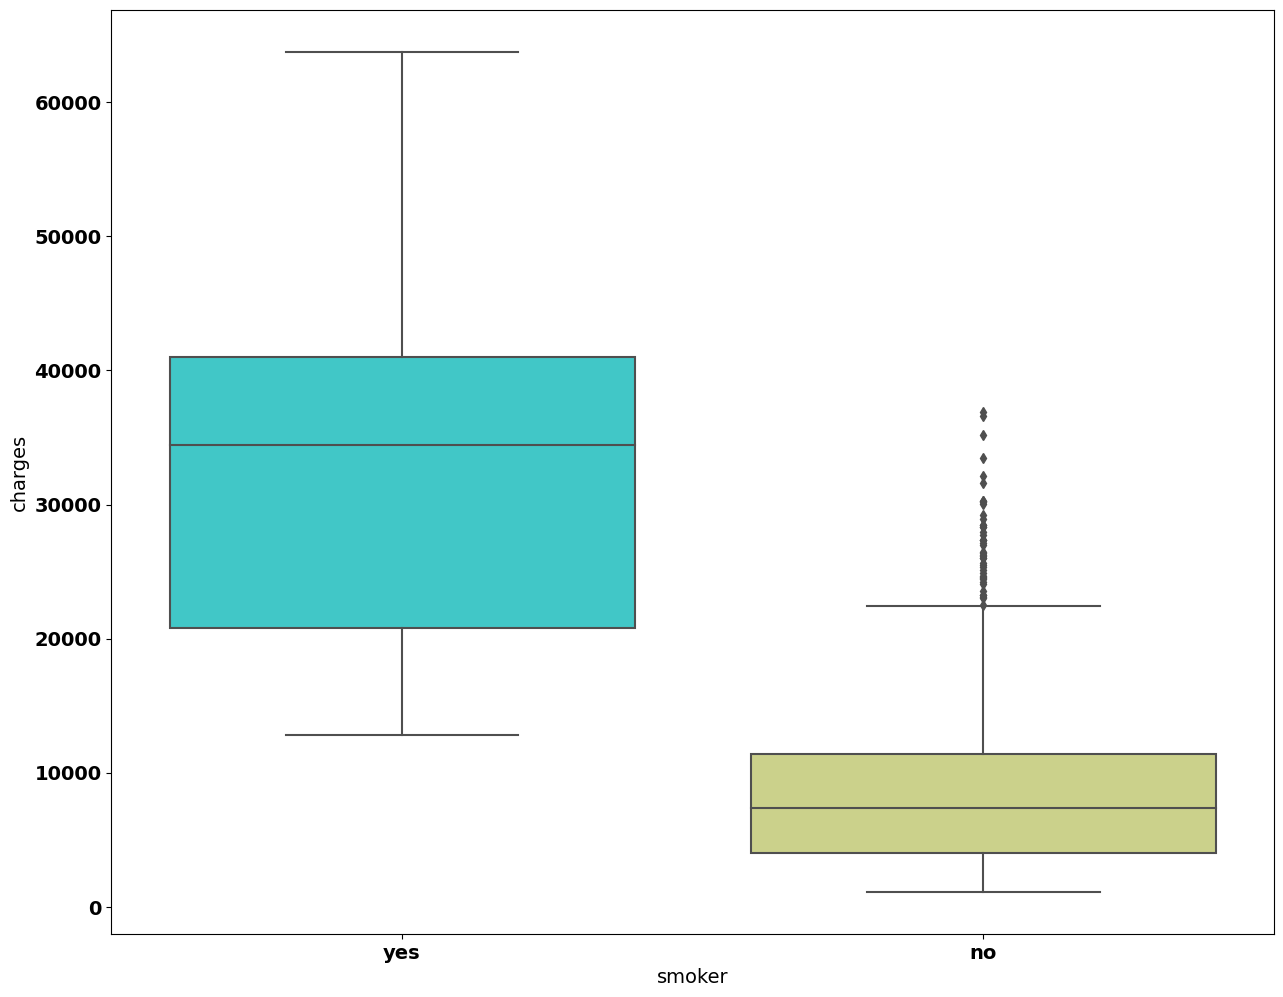

In [ ]:
## Boxplot
sns.boxplot(x="smoker", y="charges", data=df,palette='rainbow')

Or like kde plot;

smoker
no     Axes(0.125,0.11;0.775x0.77)
yes    Axes(0.125,0.11;0.775x0.77)
Name: charges, dtype: object

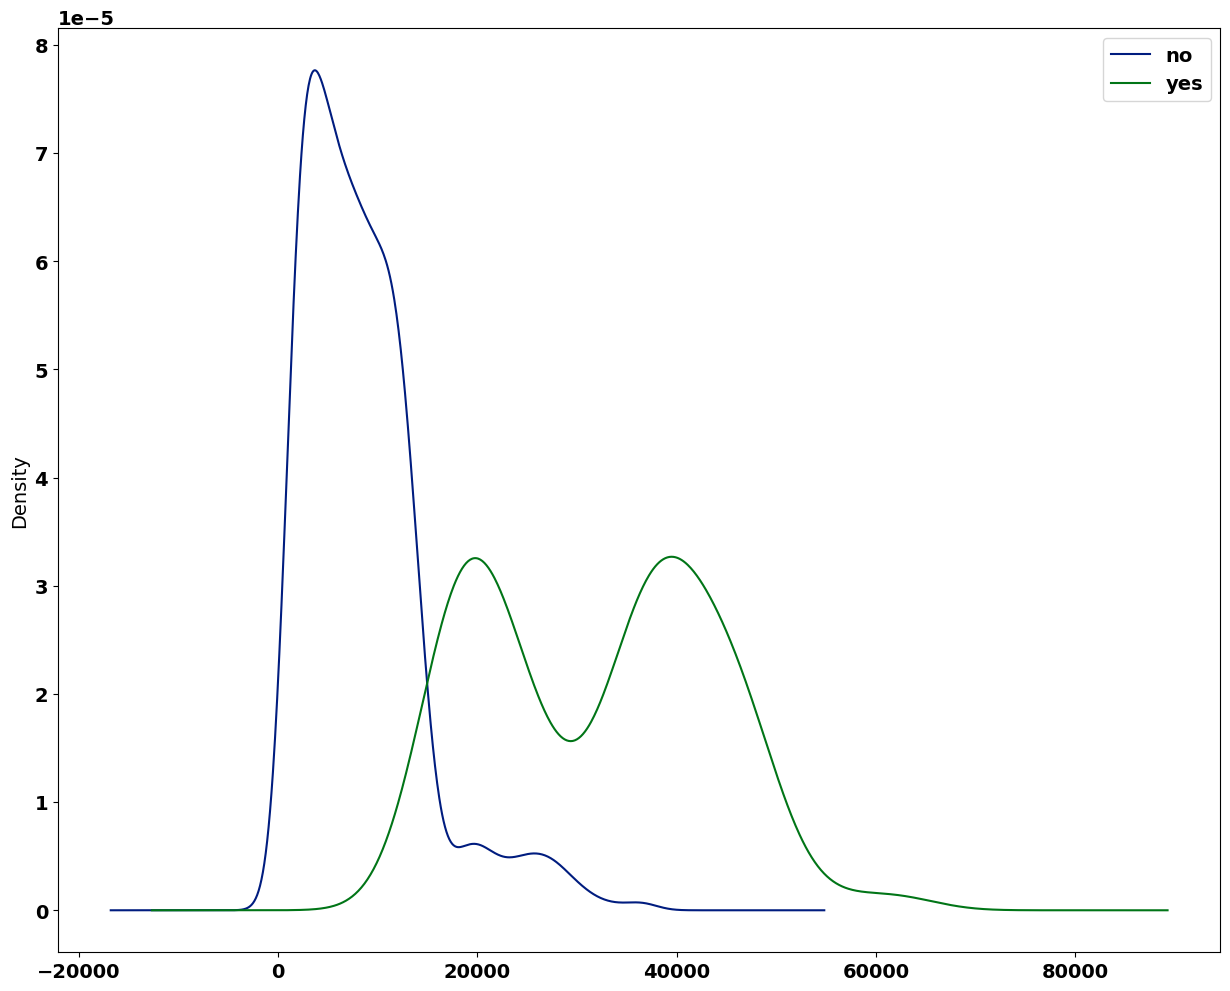

In [ ]:
# Examine the relationship between “smoker” and “charges”
## Kde plot
df.groupby('smoker')['charges'].plot(kind='kde', legend=True)


It's clear that the mean of the non-smoker's charges is smaller than smoker's charges.

It's worth to examine the reason of the higher charges belongs non-smokers.

On the other hand, if we explore the effect of sex on bmi, we can see it's not giving a lot of information to us, because the distribution of two groups (male & female) is more similar to each other than previous exploration.


<Axes: xlabel='sex', ylabel='bmi'>

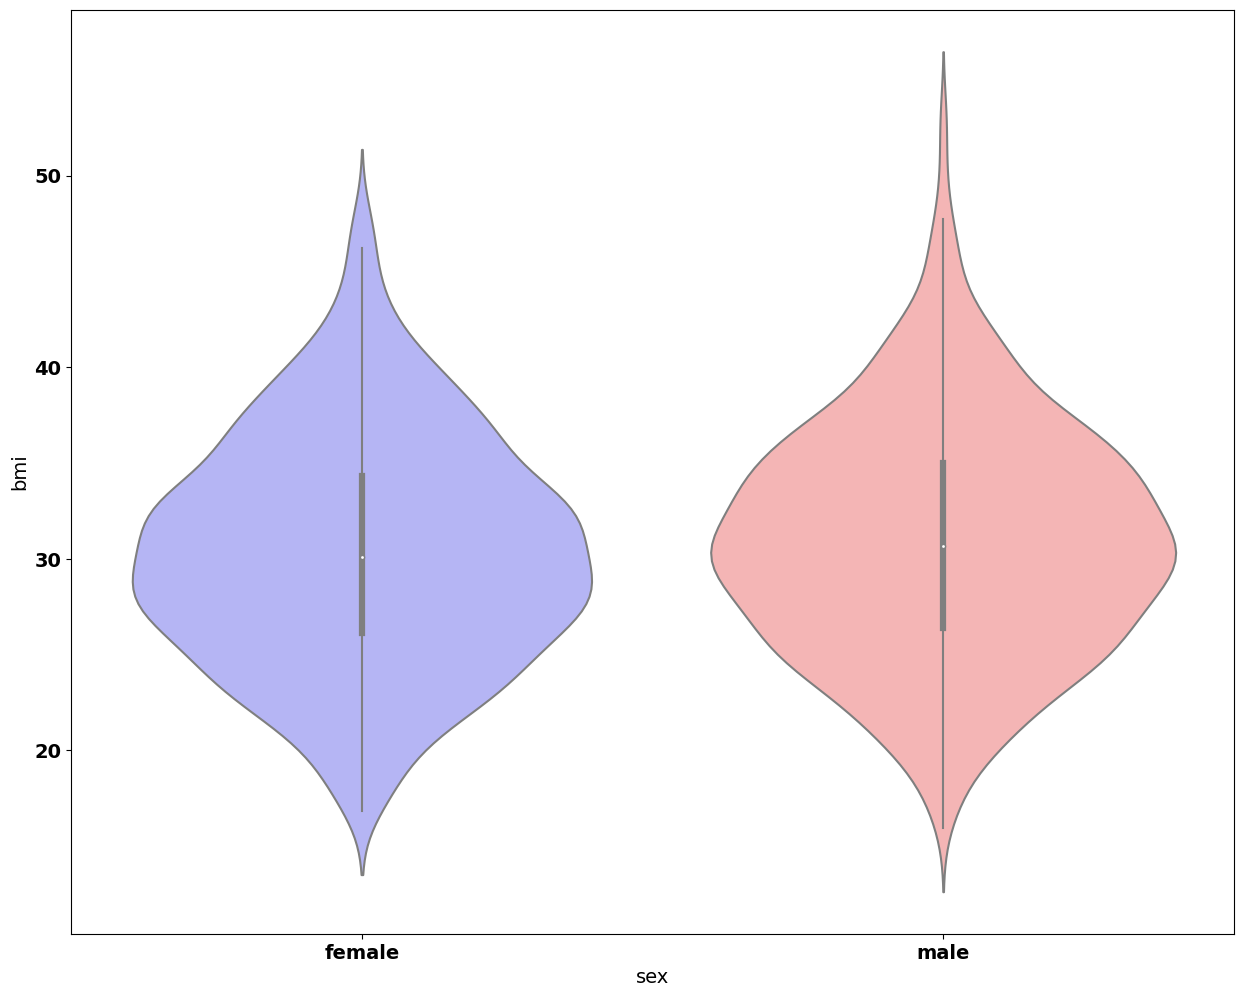

In [ ]:
# Examine the relationship between “bmi” and “sex”
## Violin plot of BMI vs sex

sns.violinplot(x='sex', y='bmi',data=df,palette='bwr')

<Axes: xlabel='sex', ylabel='bmi'>

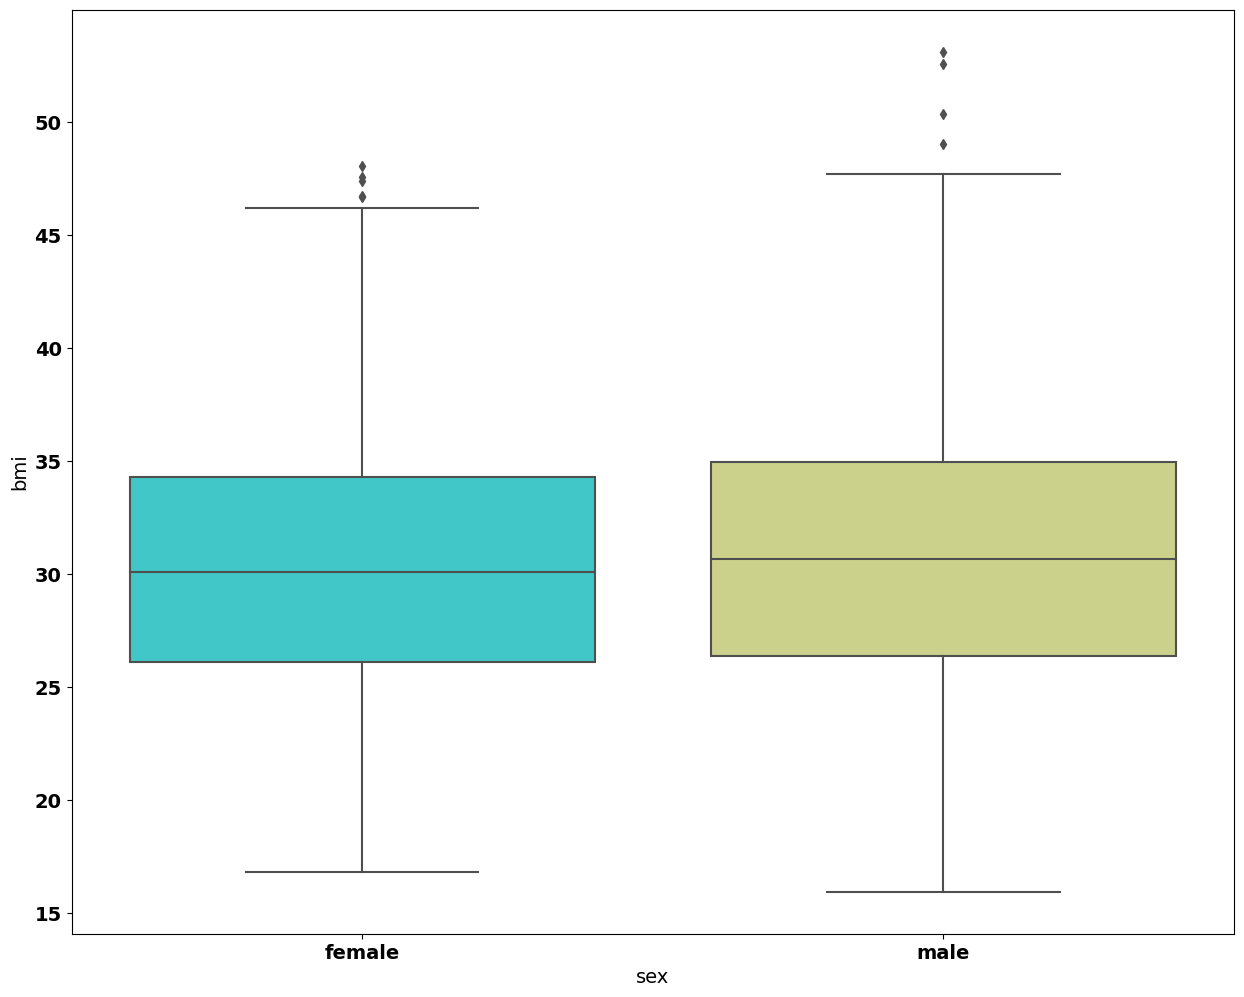

In [ ]:
## Boxplot
sns.boxplot(x="sex", y="bmi", data=df,palette='rainbow')

sex
female    Axes(0.125,0.11;0.775x0.77)
male      Axes(0.125,0.11;0.775x0.77)
Name: bmi, dtype: object

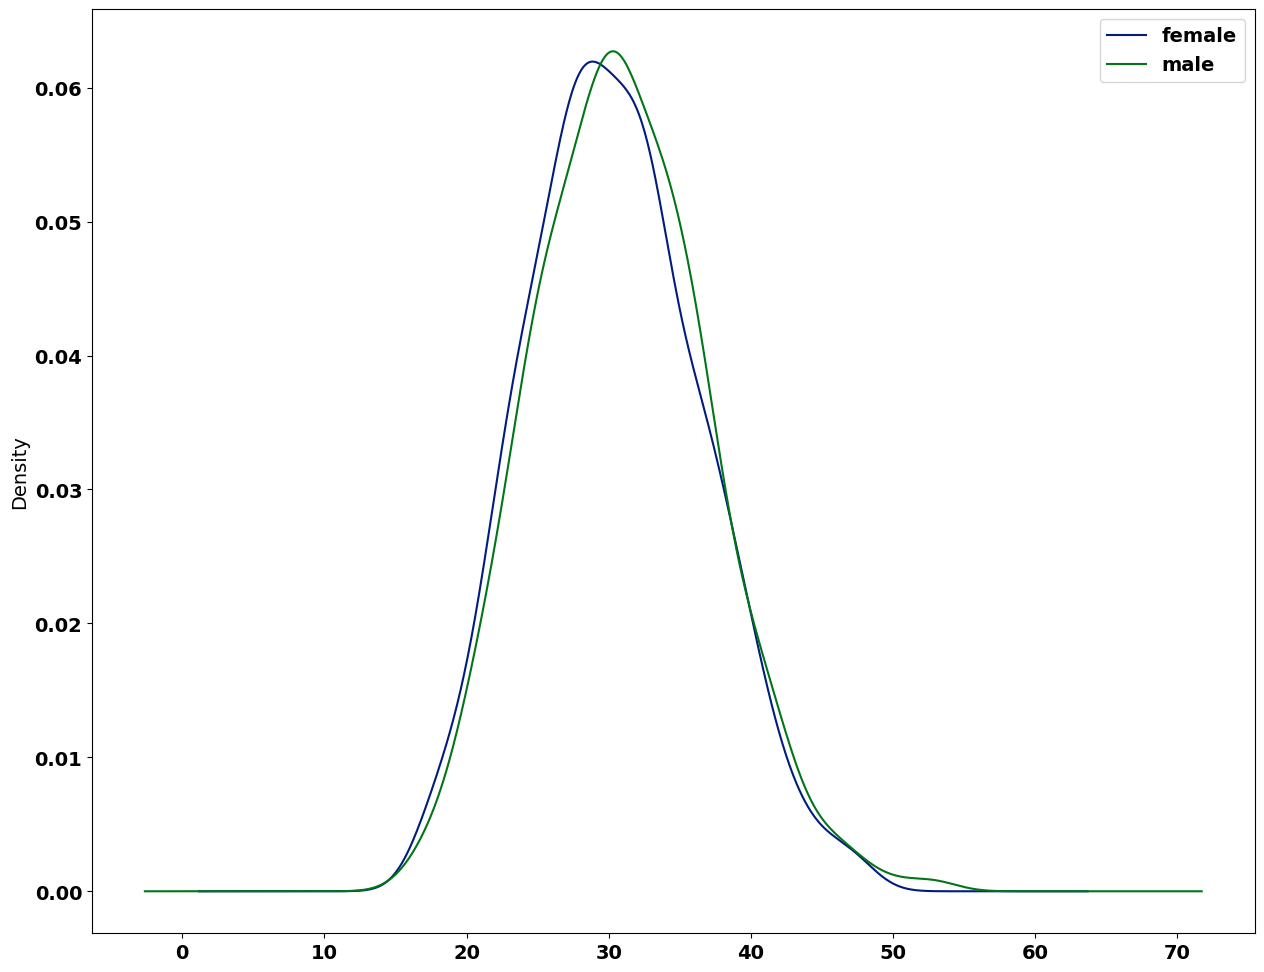

In [ ]:
# Kde plot
df.groupby('sex')['bmi'].plot(kind='kde', legend=True)

This graph tells us about the distribution of the BMI. Since the groups cover all the data and have very close distributions, the distribution of bmi will also be similar.

We can check it;

<Axes: ylabel='Density'>

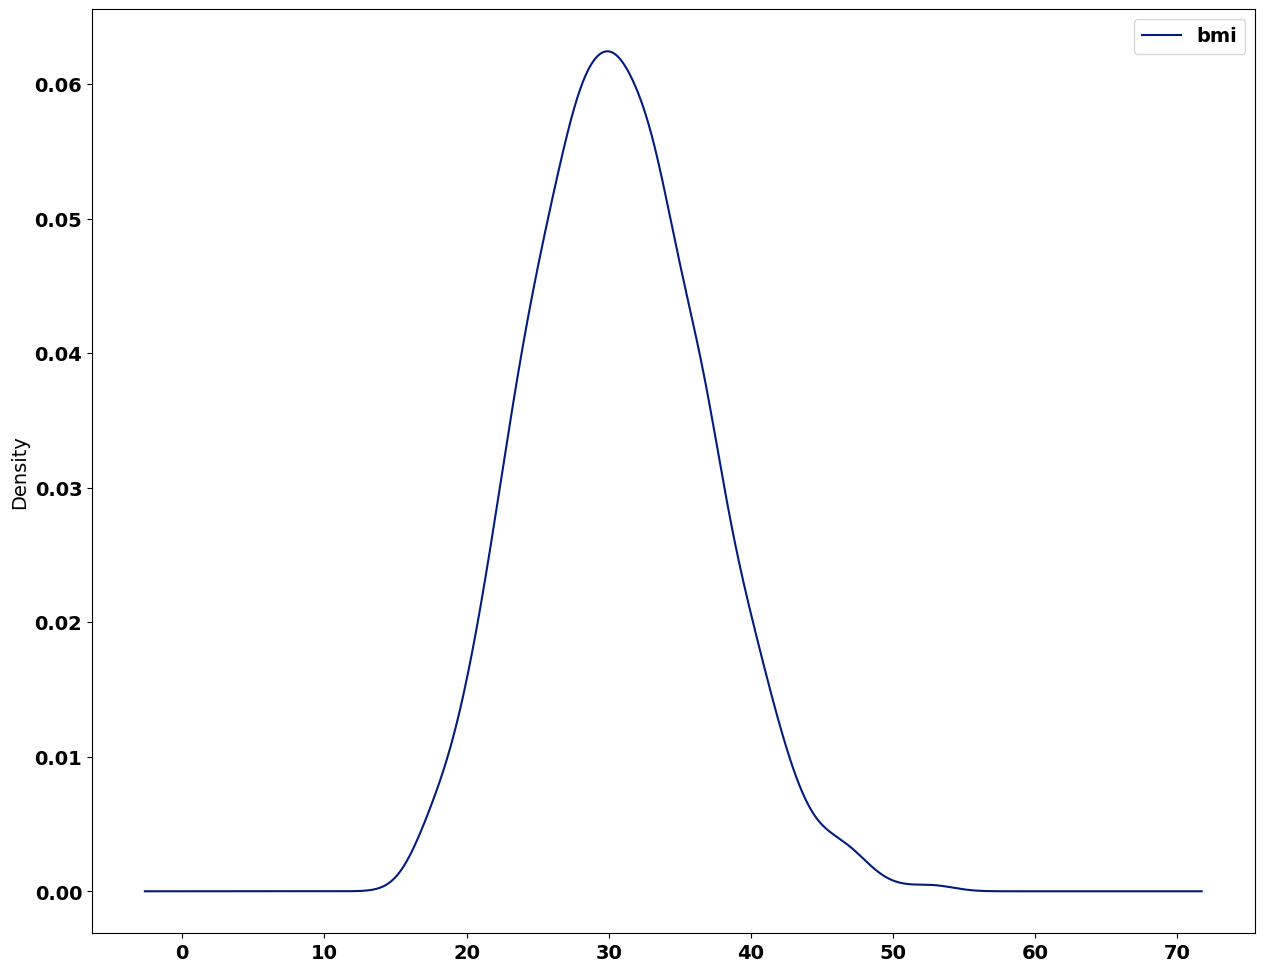

In [ ]:
# Examine the distribution of Bmi (Body Mass Index)
## To visualize distribution of values in bmi column
## kde plot
df['bmi'].plot(kind='kde', legend=True)


<Axes: >

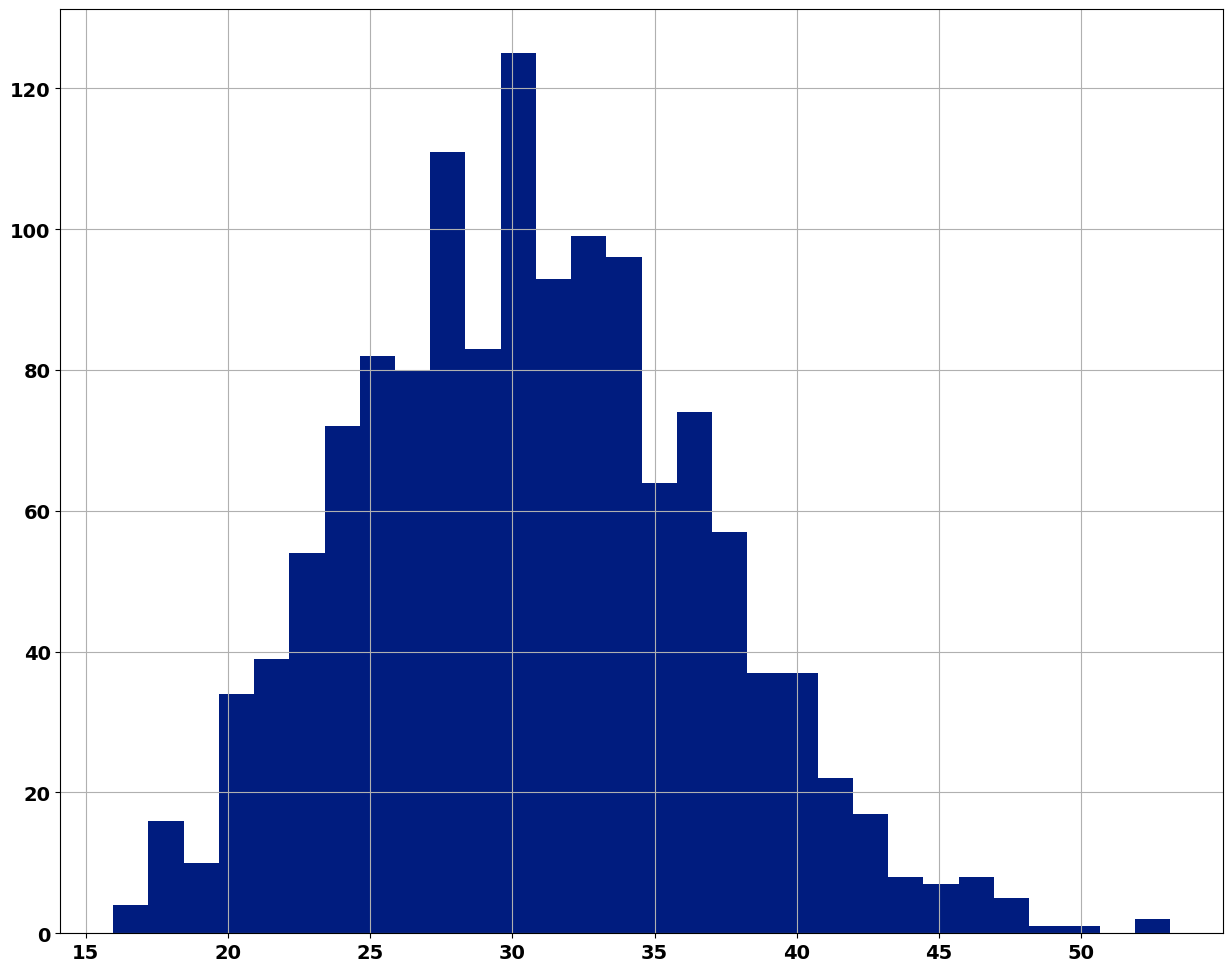

In [ ]:
## histogram
df['bmi'].hist(bins= 30)

If we want to look at the relationship of two categorical variables, we can apply numericalization.

For example; to examine the relationship between “smoker” and “region” we can use cross tabulation between them & create a numerical value to plot.


smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


<Axes: xlabel='region'>

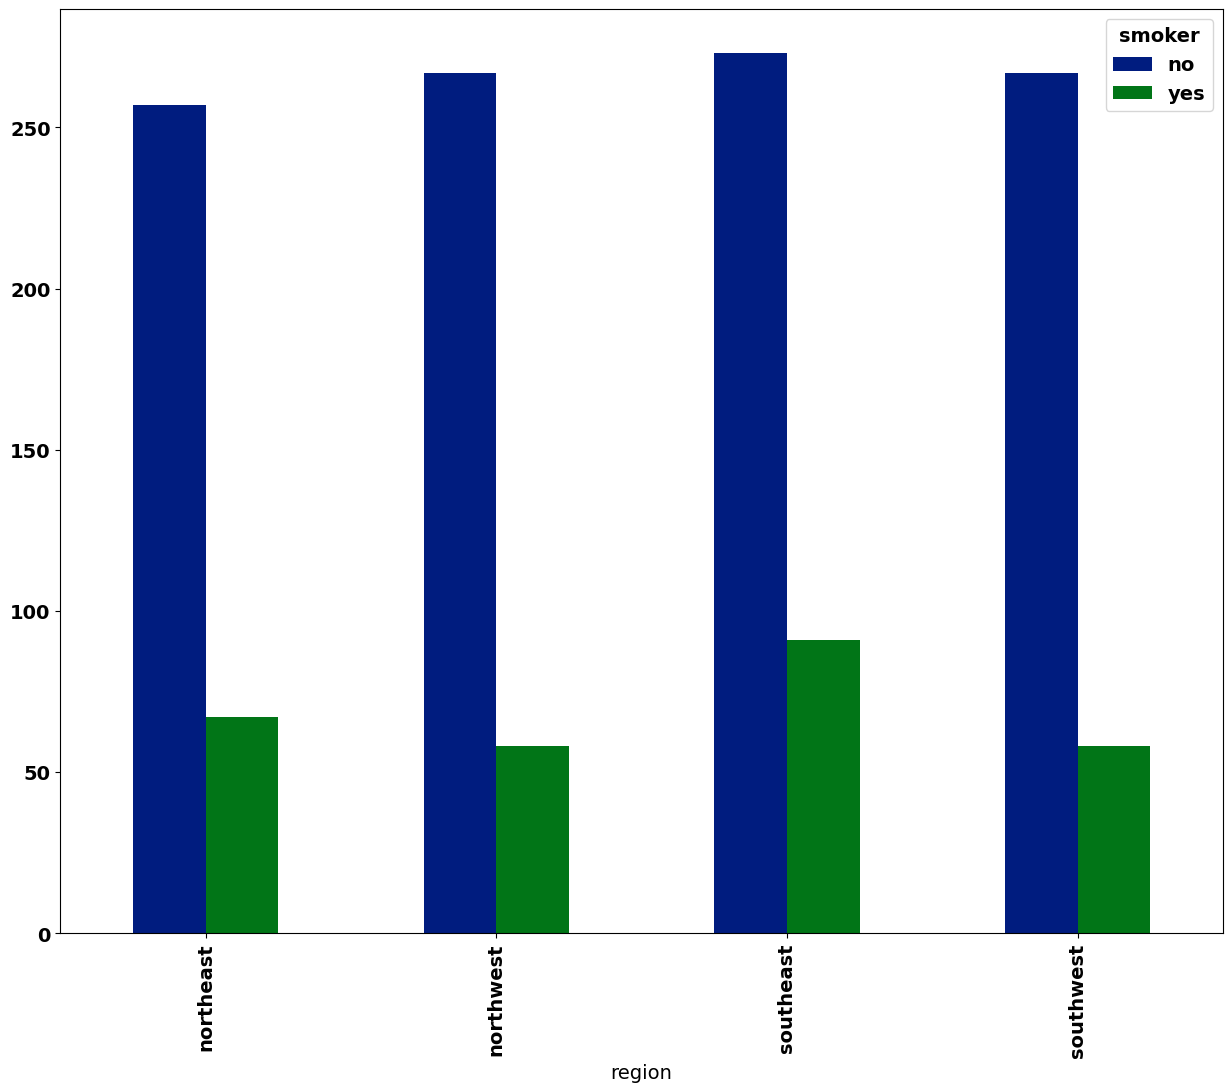

In [ ]:
# Examine the relationship between “smoker” and “region”.

## If we are talking about two or more categorical variables to examine the relationship
## between them we can use crosstab to count & create a numerical value to plot.

### Cross tabulation between region and smoker
CrosstabResult=pd.crosstab(index=df['region'],columns=df['smoker'])
print(CrosstabResult)

### Grouped bar chart between region and smoker
CrosstabResult.plot.bar(legend=True)

Or to look at the children numbers by regions we can basically group the data by region and sum of the values for each group.

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64


<Axes: xlabel='region'>

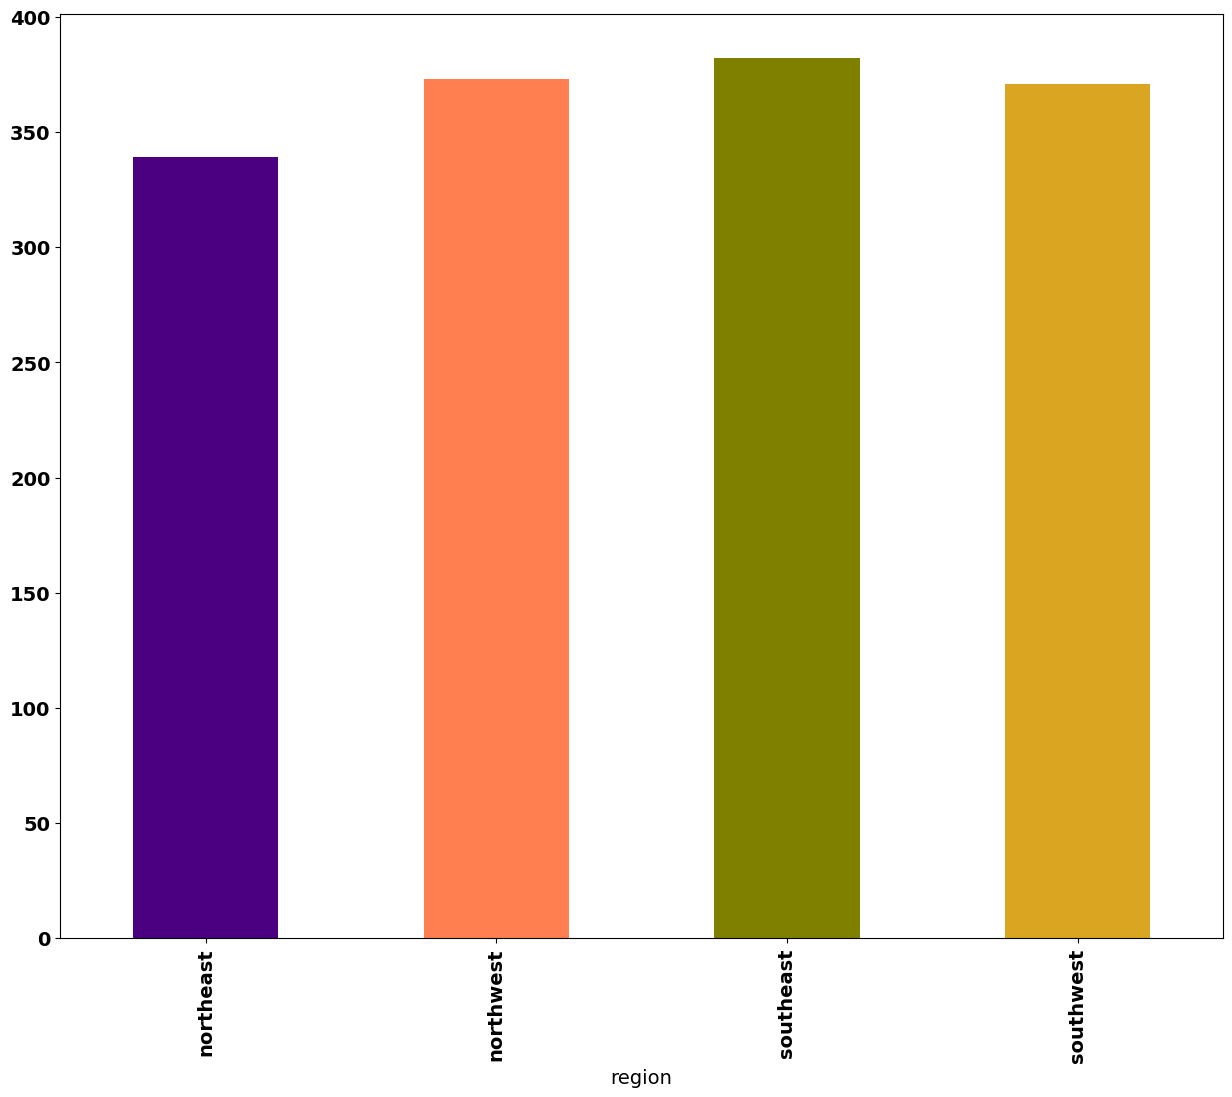

In [ ]:
# Total number of children by regions
df.groupby('region')['children'].sum()
print(df.groupby('region')['children'].sum())

# visualization of total number of children by regions
colors = ['indigo','coral','olive', 'goldenrod', 'black', 'red', 'green', 'blue', 'cyan','brown','grey', 'lime','violet']
df.groupby('region')['children'].sum().plot.bar(color=colors)

Or we can use a aggregation function to sum it up.


In [ ]:
# Or we can use a aggregation function to sum it up.
df.groupby('region', as_index=False).agg({"children": "sum"})

,region,children
0,northeast,339
1,northwest,373
2,southeast,382
3,southwest,371


Although I'm not recommended to do that for every data we can also check how many data points we have on "no child", "1 child", "2 child", "3 child", "4 child" or "5 children" if we treat these numbers like categorical data.

<Axes: xlabel='region,children'>

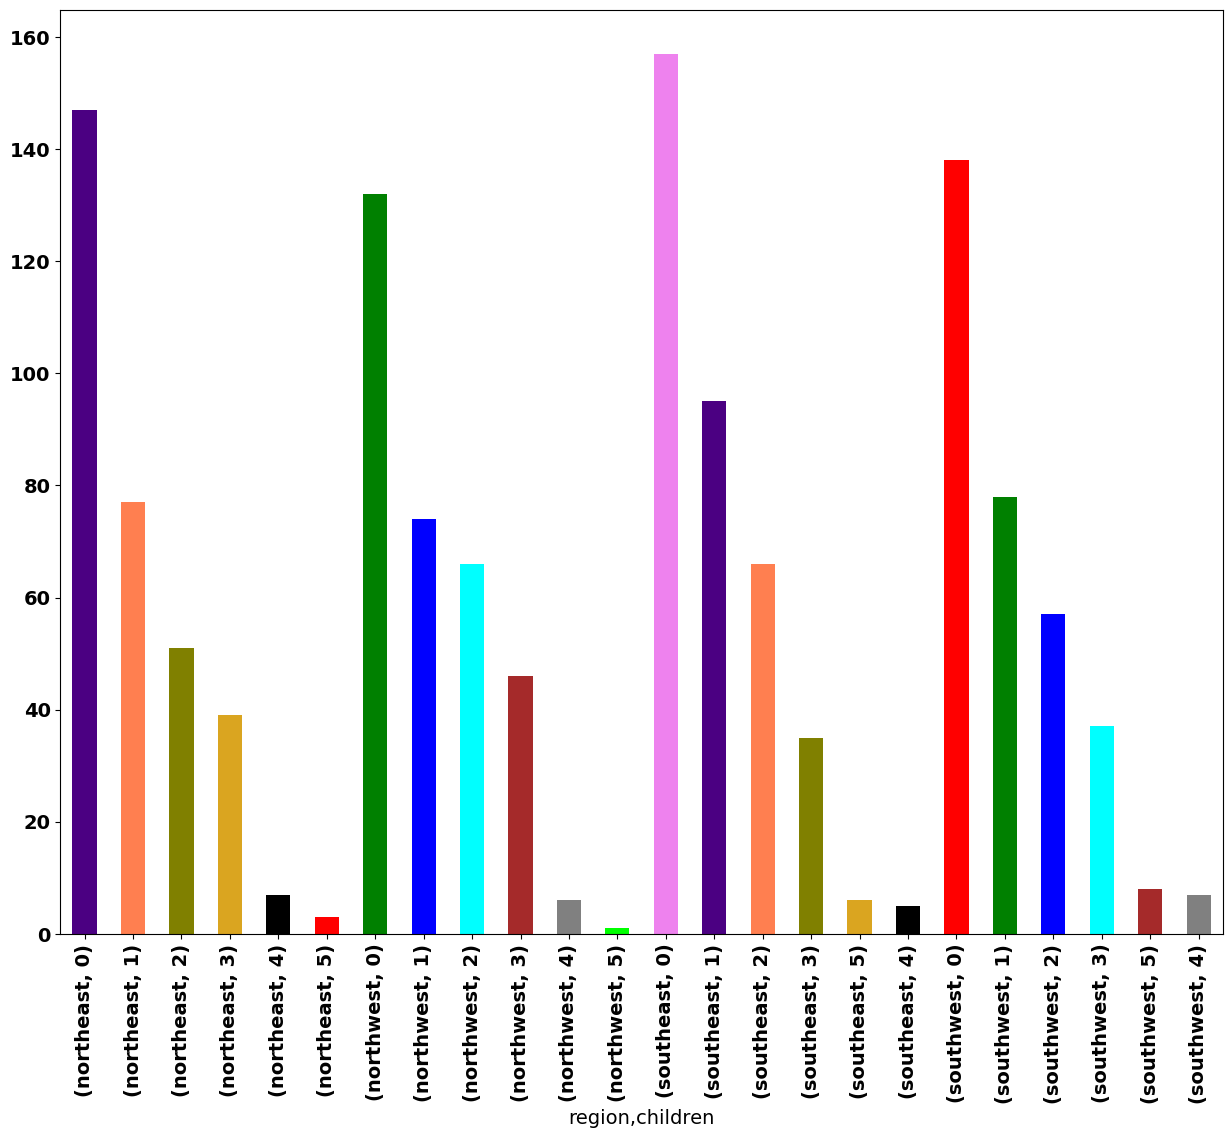

In [ ]:
# the total numbers of children categories by regions
df.groupby('region')['children'].value_counts()

## visualization of children categories by regions
colors = ['indigo','coral','olive', 'goldenrod', 'black', 'red', 'green', 'blue', 'cyan','brown','grey', 'lime','violet']
df.groupby('region')['children'].value_counts().plot.bar(color=colors)

We can also examine the relation of two or more numerical values.

<Axes: xlabel='age'>

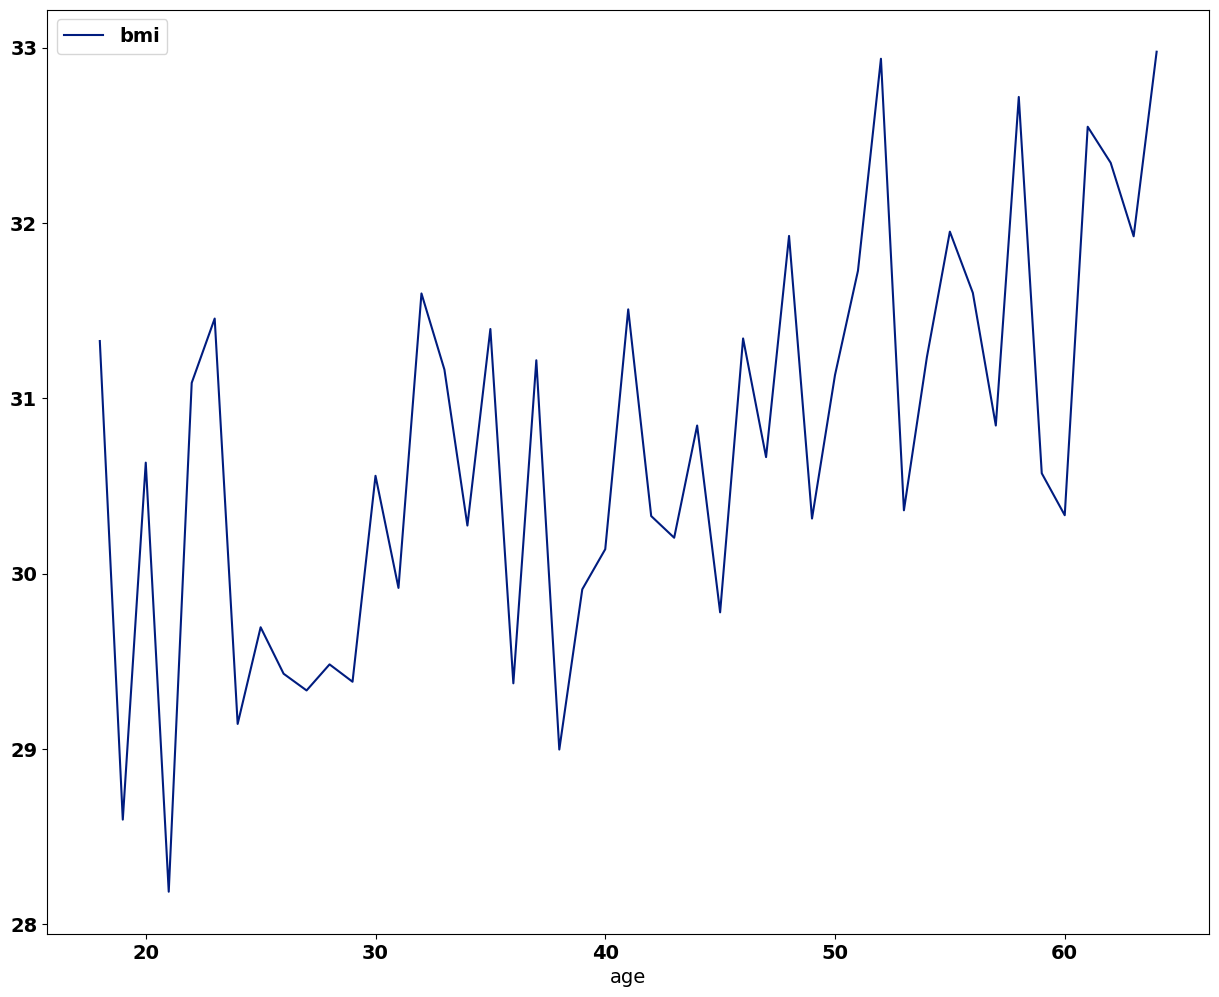

In [ ]:
# Examine the relationship between “age” and “bmi”
df.groupby('age')['bmi'].mean().plot(kind='line', legend=True)

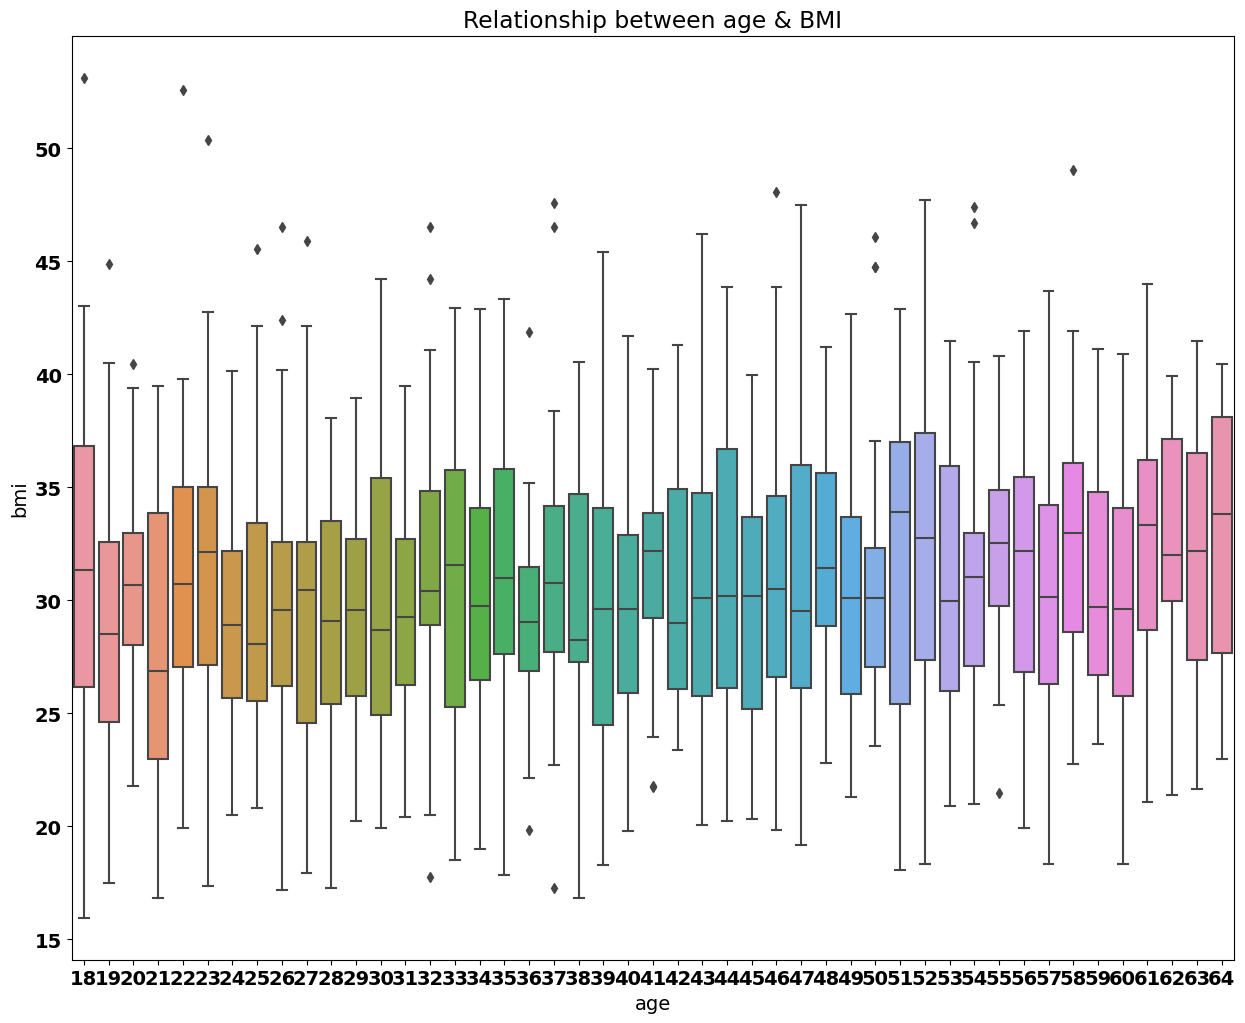

In [ ]:
sns.boxplot(x='age', y='bmi', data=df )
plt.title('Relationship between age & BMI')
plt.show()

Text(0.5, 1.0, 'Relationship between children number & BMI')

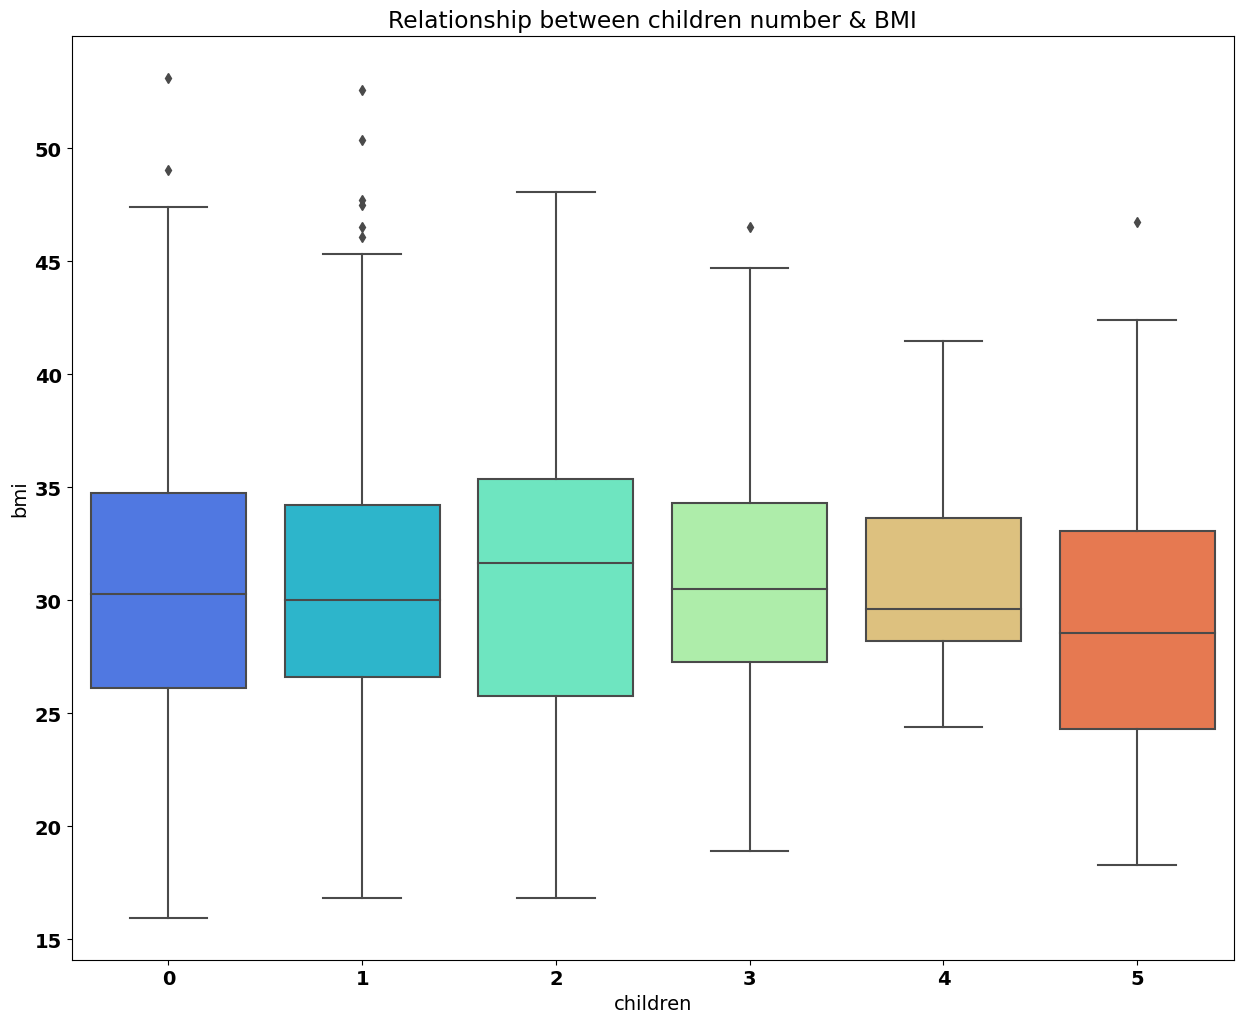

In [ ]:
# Examine the relationship between “children” and “bmi”
sns.boxplot(x="children", y="bmi", data=df, palette='rainbow')
plt.title('Relationship between children number & BMI')


<Axes: xlabel='children', ylabel='bmi'>

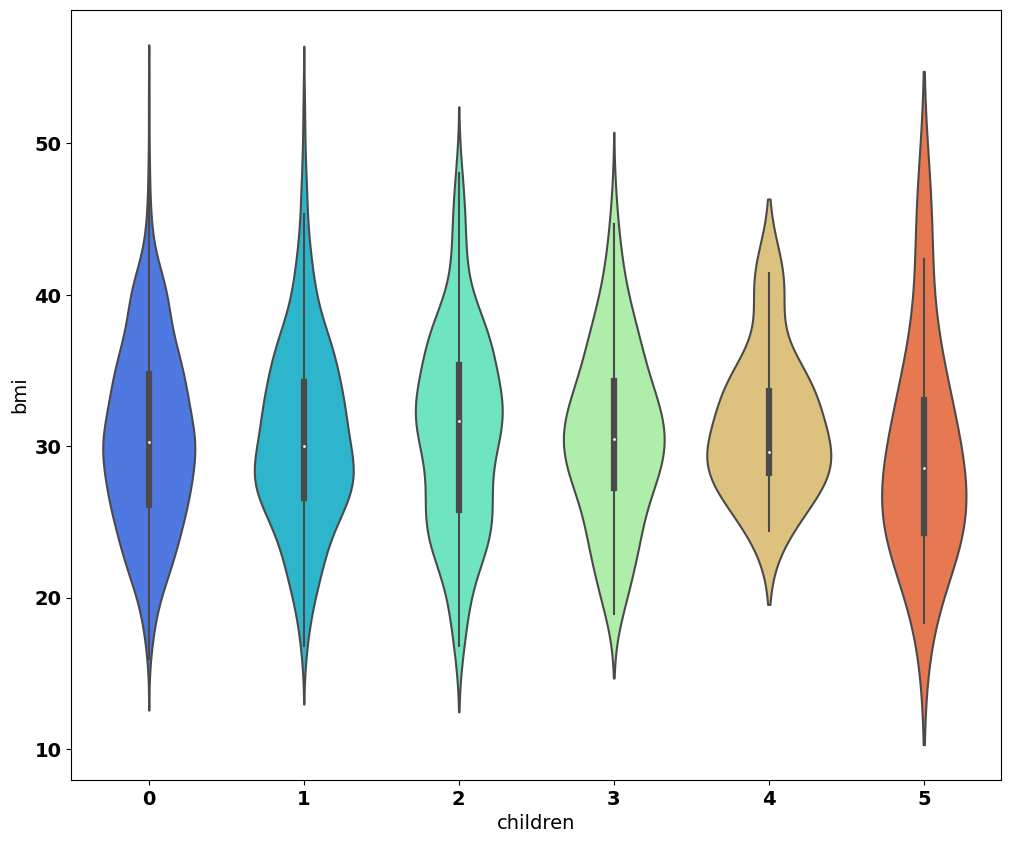

In [ ]:
sns.violinplot(x="children", y="bmi", data=df,palette='rainbow')


<Axes: xlabel='bmi', ylabel='region'>

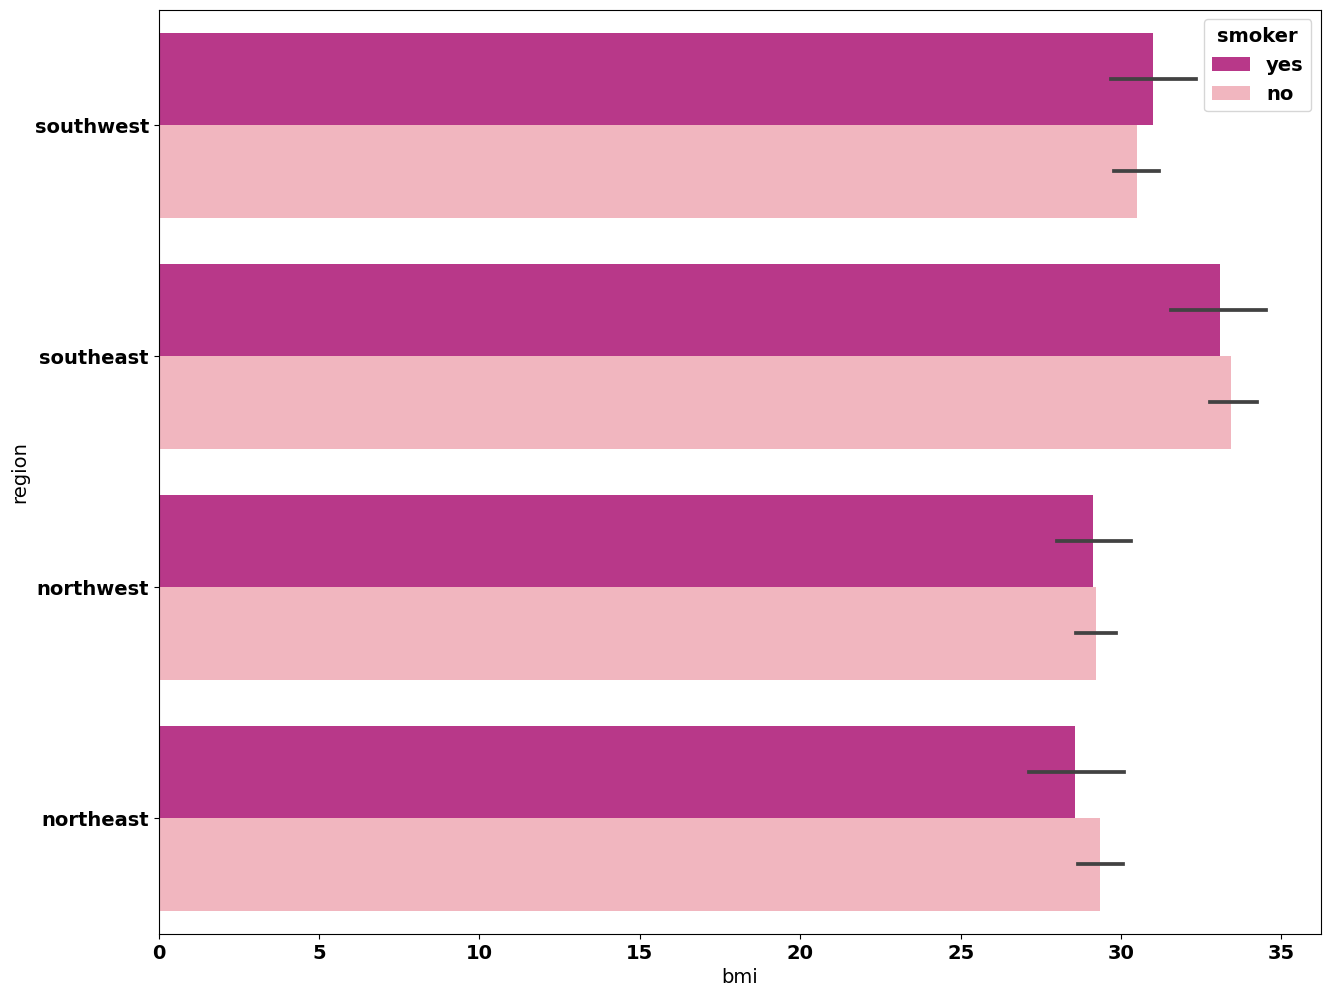

In [ ]:
# Examine the relationship between "region", "smoker" and "bmi"
sns.barplot(x='bmi', y='region', hue='smoker', data=df, palette='RdPu_r')


<Axes: xlabel='region', ylabel='bmi'>

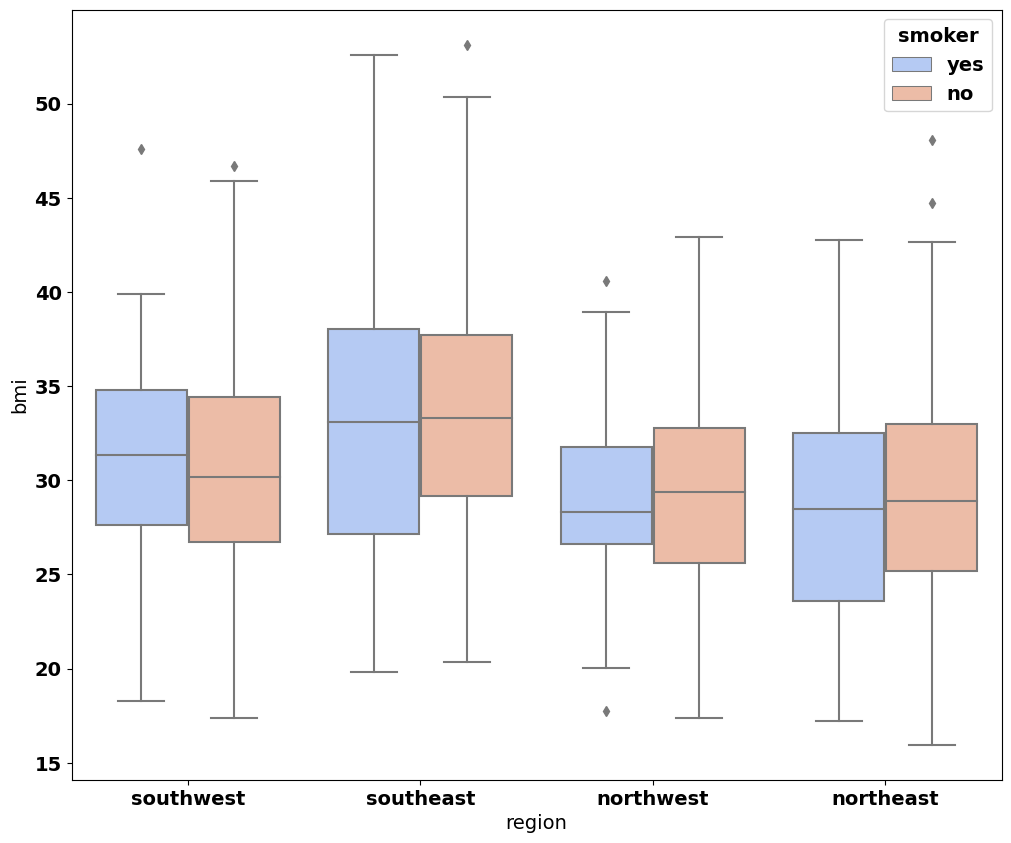

In [ ]:
sns.boxplot(x="region", y="bmi", hue="smoker",data=df, palette="coolwarm")

<Axes: xlabel='region', ylabel='bmi'>

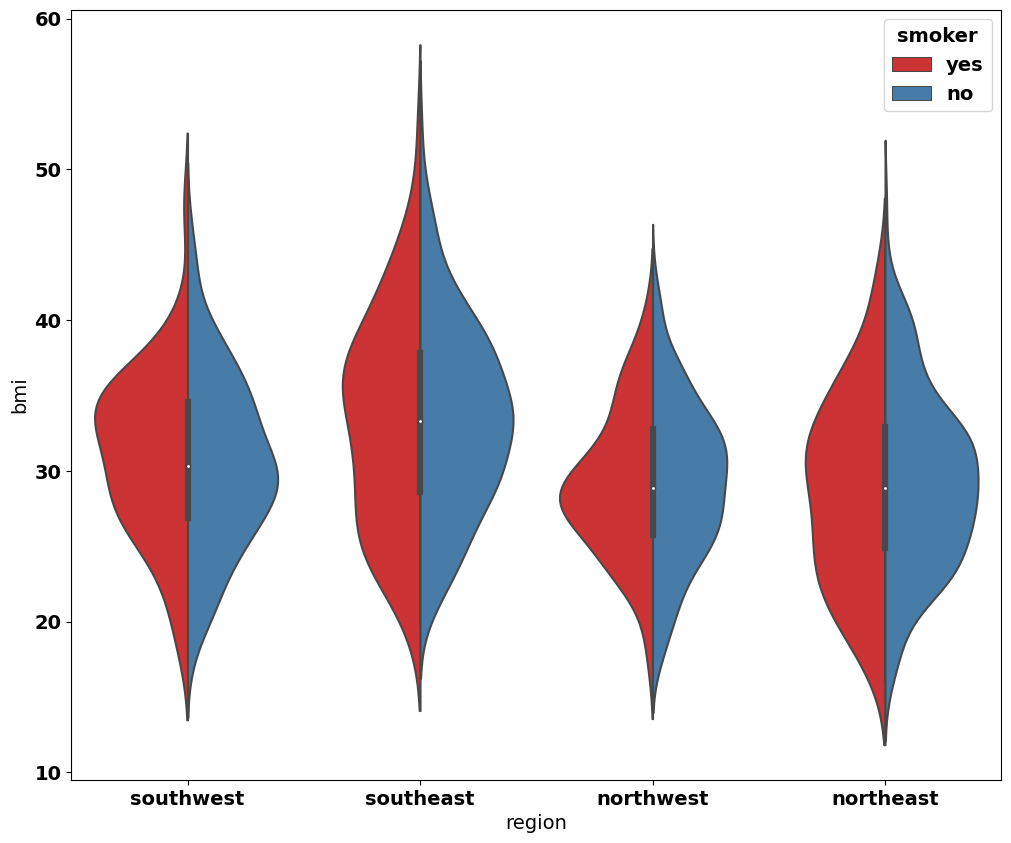

In [ ]:
sns.violinplot(x="region", y="bmi", data=df, hue='smoker', split=True, palette='Set1')

The relationship between "region", "smoker" and "bmi" is similar to the relationship between "sex" & "bmi". It's almost balanced between regions.

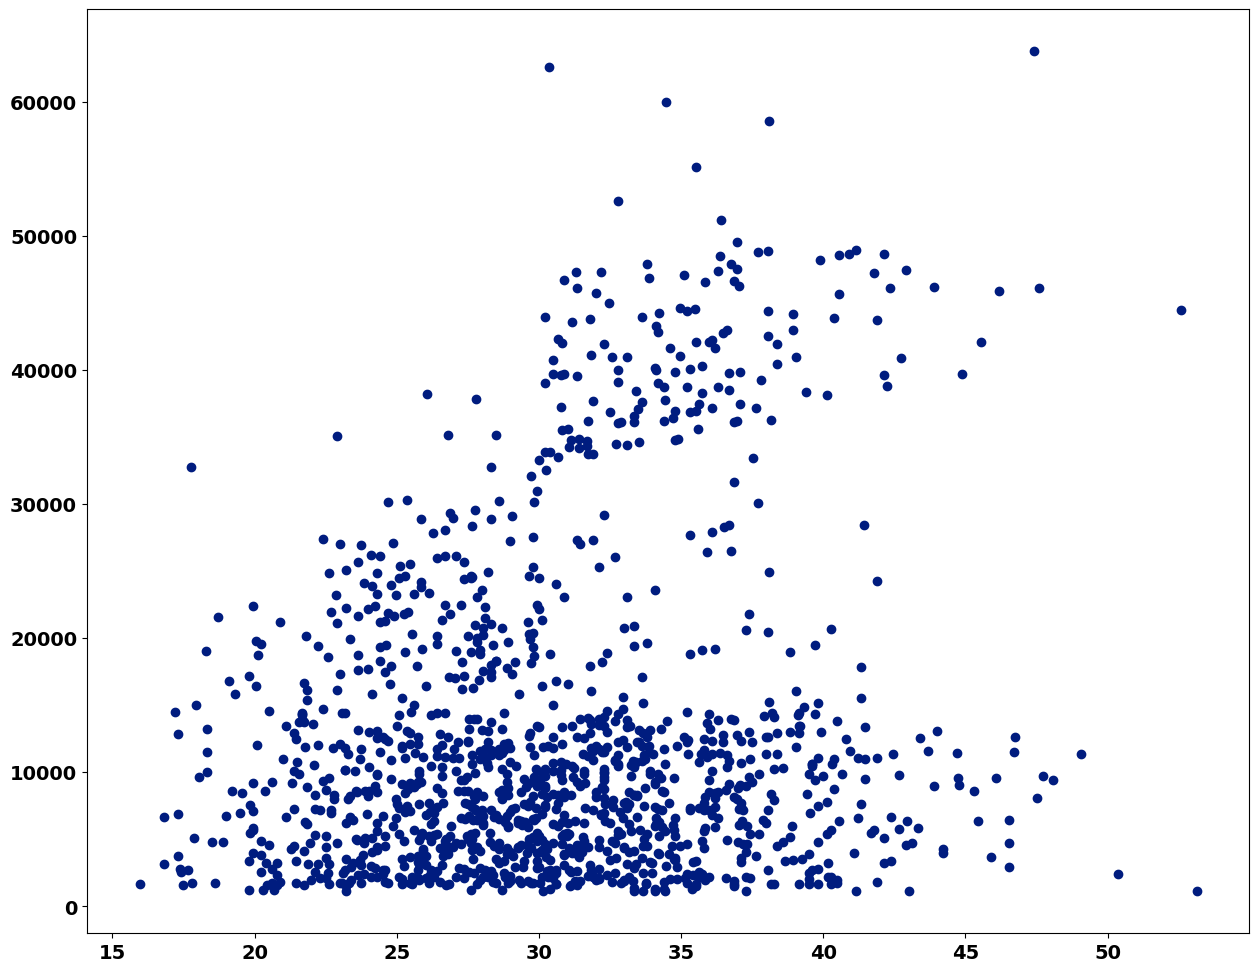

In [ ]:
# Examine the relationship between “bmi” and “charges”.
plt.scatter(df['bmi'], df['charges'])
plt.show()

It's seems like influenced by other features, so we can check smoking or having children has anything with it.

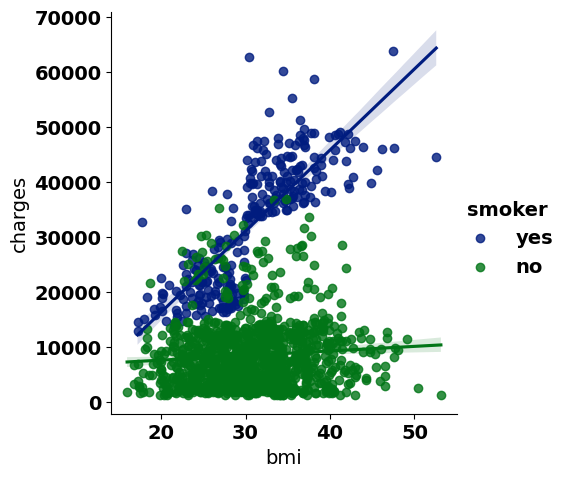

In [ ]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data = df)


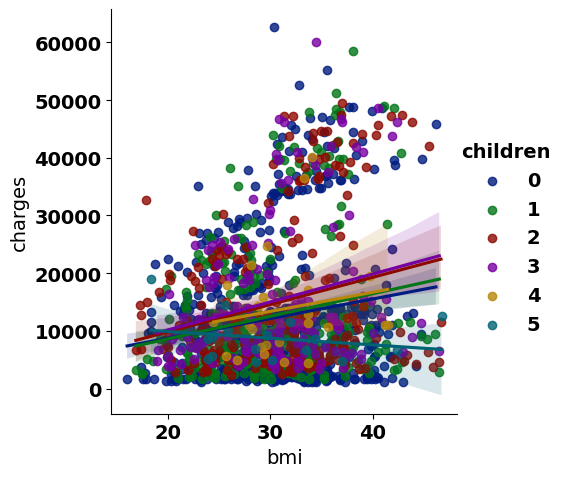

In [48]:
sns.lmplot(x="bmi", y="charges", hue="children", data = df)

## Finding outliers
Is there an outlier in the "bmi" variable? Please review.

<Axes: >

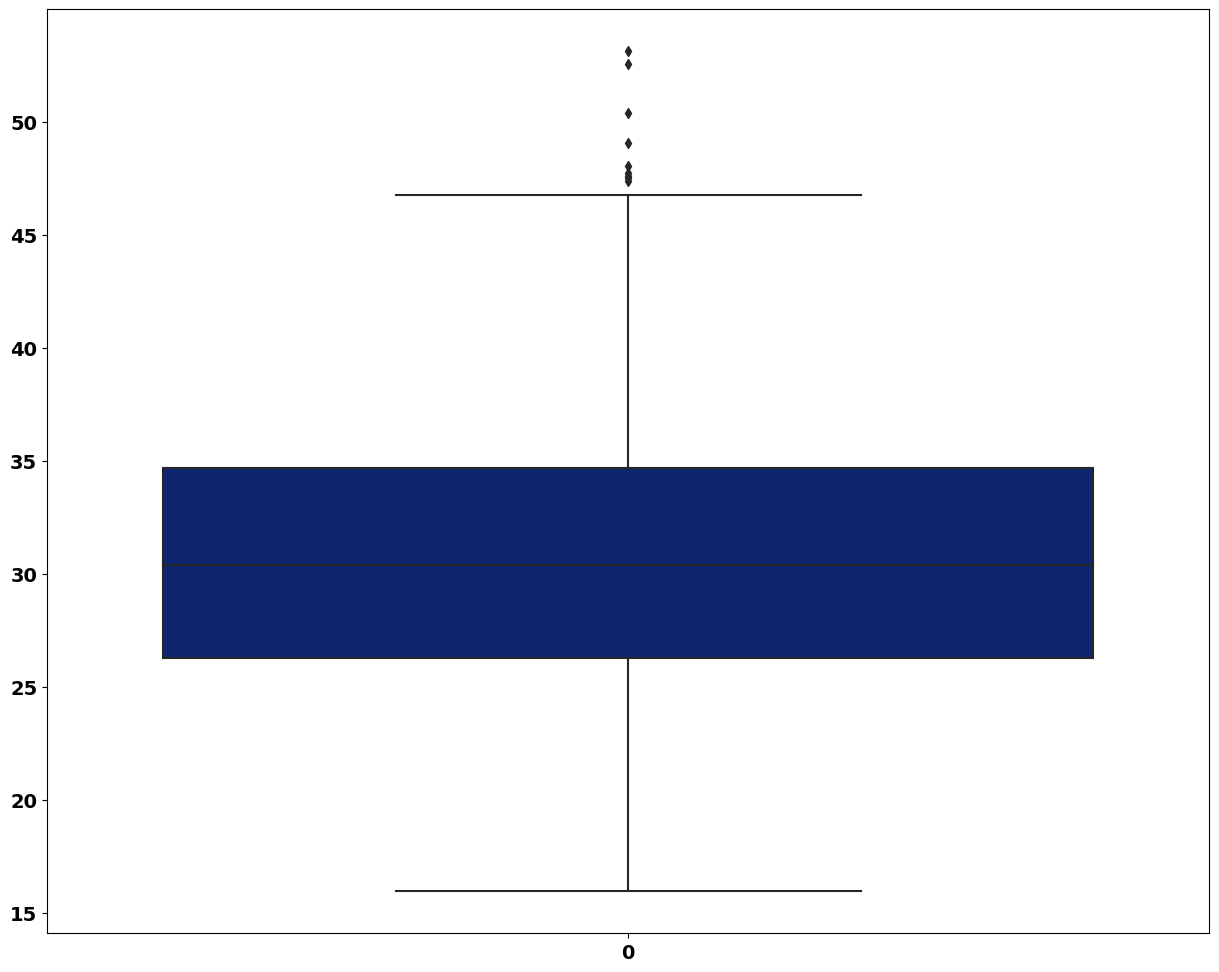

In [105]:
# Box Plot
## with box plot we can see the upper & lower bounds
## the data points outside of these boundries are outliers.
sns.boxplot(df['bmi'])

In [106]:
# IQR
## we can also calculate the exact boundries with percentiles
Q1 = np.percentile(df['bmi'], 25, method='midpoint')
Q3 = np.percentile(df['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print("IQR:", IQR)

# Above Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['bmi']>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())

#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['bmi']<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())


IQR: 8.384999999999998
Upper Bound: 47.265
9
Lower Bound: 13.725000000000005
0


In [107]:
# Removing the outliers
## We can create arrays indicating the outlier rows
upper_array = np.where(df['bmi']>=upper)[0]
lower_array = np.where(df['bmi']<=lower)[0]

## Printing the outliers
print(upper_array)
print(lower_array)

[ 116  286  401  543  847  860 1047 1088 1317]
[]


In [108]:
## Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Check the new shape of the dataframe after removing outliers
print("New Shape: ", df.shape)

New Shape:  (1329, 7)


<Axes: >

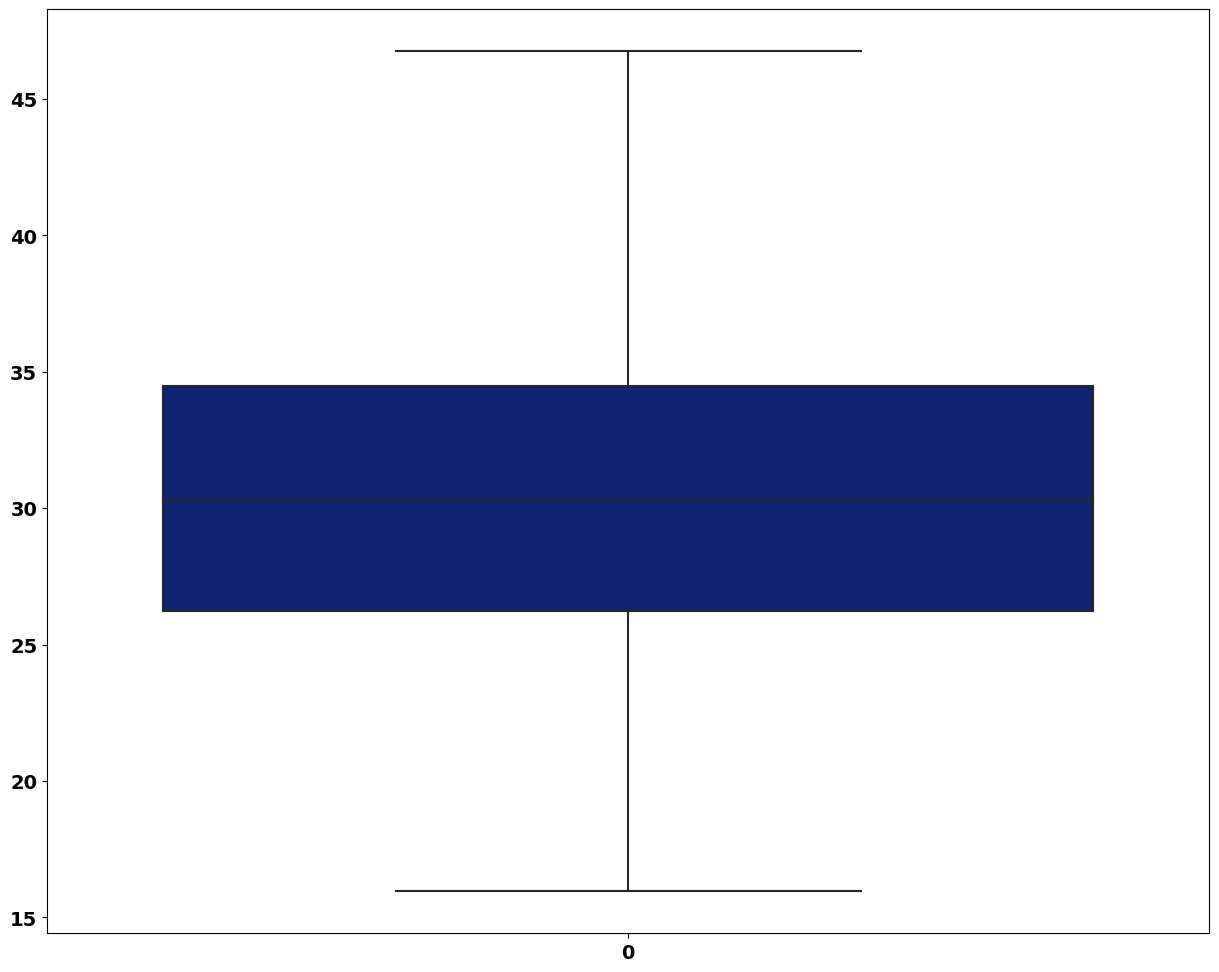

In [109]:
sns.boxplot(df['bmi'])

<Axes: >

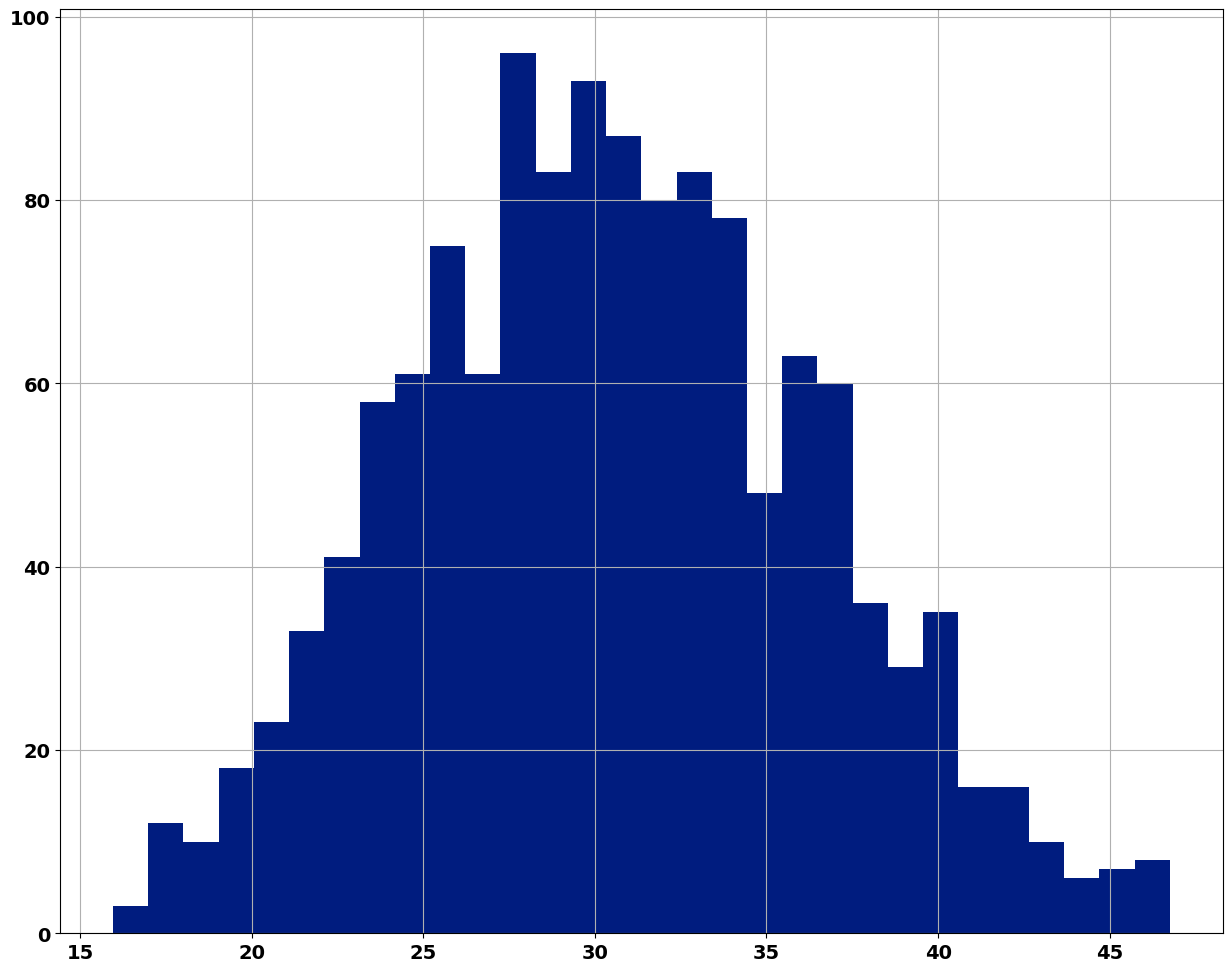

In [110]:
## histogram
df['bmi'].hist(bins= 30)

After eliminating the outliers the data seems more like normal distribution.


## Label Encoder

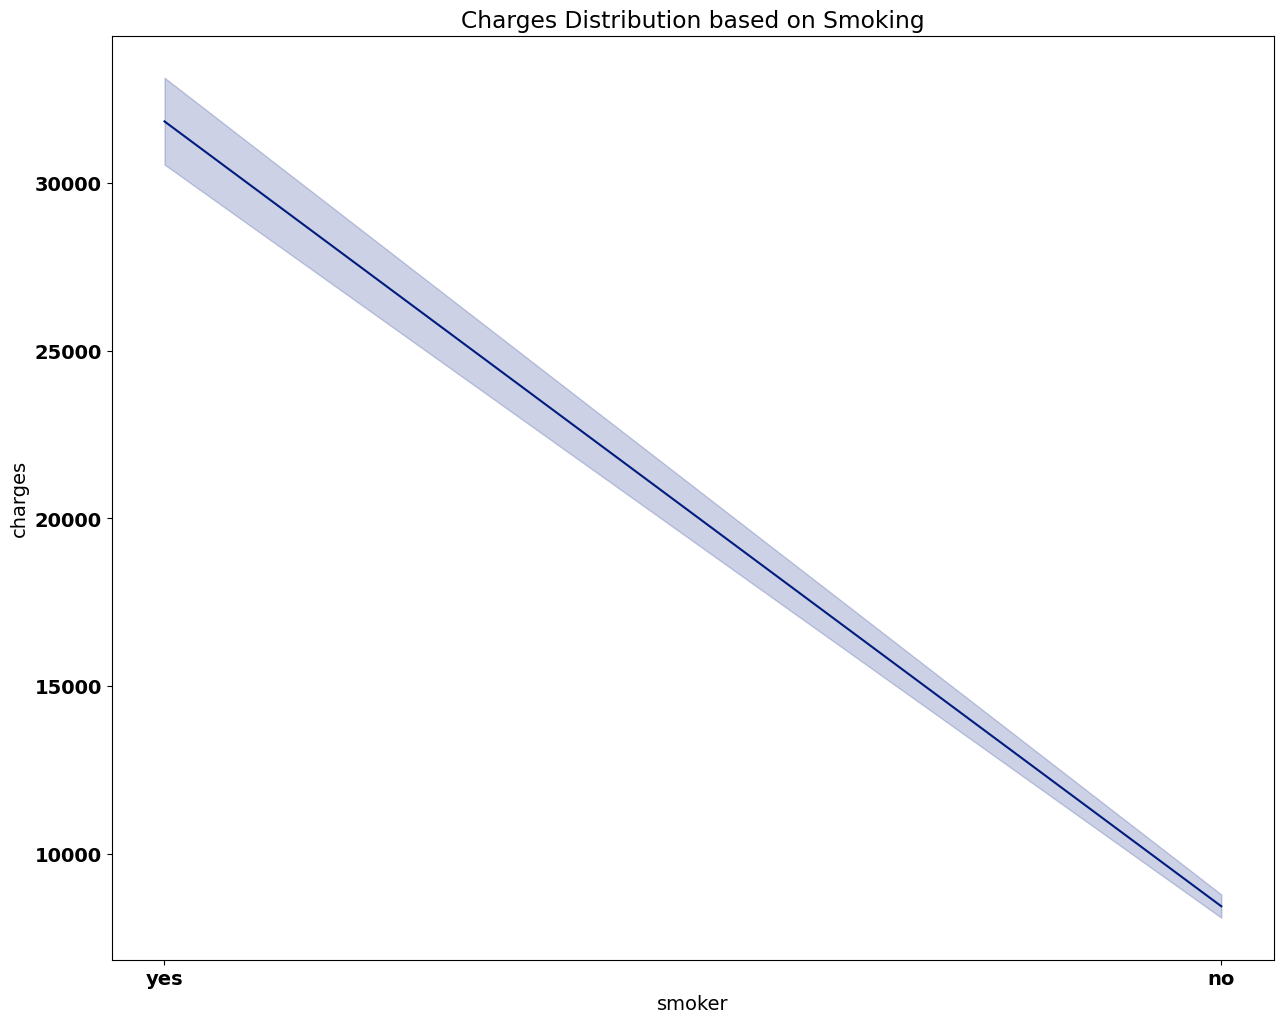

sex: ['female' 'male']
sex_encode: [0 1]
smoker: ['yes' 'no']
smoker_encode: [1 0]


In [111]:
# Label_encoder
labelencoder = preprocessing.LabelEncoder()
df['sex_encode'] = labelencoder.fit_transform(df['sex'])
df['smoker_encode'] = labelencoder.fit_transform(df['smoker'])
#df['region_encode'] = labelencoder.fit_transform(df['region'])

#We can see it when we look at the line plot: If you are a smoker, than you have high charge.
sns.lineplot(x='smoker', y='charges', data=df)
plt.title('Charges Distribution based on Smoking')
plt.show()

print("sex:", df['sex'].unique())
print("sex_encode:", df['sex_encode'].unique())

print("smoker:", df['smoker'].unique())
print("smoker_encode:", df['smoker_encode'].unique())

#print("region:", df['region'].unique())
#print("region_encode:", df['region_encode'].unique())



In [112]:
# One-Hot Encoding
region_encoded = pd.get_dummies(df['region'], prefix='region', drop_first=True)
df_encoded = pd.concat([df, region_encoded], axis=1)
df_encoded = df_encoded.drop('region', axis=1)

# Models

## Train - test - split

In [113]:
from sklearn.model_selection import train_test_split

df = df.drop("sex", axis =1)
df = df.drop("region", axis =1)
df = df.drop("smoker", axis =1)

X = df.drop('charges', axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


## Standart Scaler

In [114]:
#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[-1.07223536,  0.90164479, -0.89968669,  1.        , -0.50503537],
       [ 0.98731792,  1.07160042,  1.58558645, -1.        ,  1.98005932],
       [ 1.058337  ,  0.22862048,  1.58558645, -1.        , -0.50503537],
       ...,
       [-1.00121628, -1.65788705, -0.07126231, -1.        , -0.50503537],
       [-0.36204457, -0.46224917, -0.07126231,  1.        ,  1.98005932],
       [-0.07796826, -0.50218874, -0.89968669, -1.        , -0.50503537]])

## Linear Regression

With linear regression we can find the relationship of two variables, one of them is dependent & other one is independent.

In [118]:
# Create and fit the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate cross-validated RMSE
cv_results_lr = cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse_lr = np.sqrt(abs(cv_results_lr.mean()))

# Calculate RMSE for train set
train_rmse_lr = np.sqrt(mean_squared_error(y_train, lr.predict(X_train)))

# Calculate RMSE for test set
test_rmse_lr = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))


# Display results with proper spacing
print("Cross-Validated RMSE:", cv_rmse_lr)
print("Train Set RMSE:", train_rmse_lr)
print("Test Set RMSE:", test_rmse_lr)
print("R2 Score:", lr.score(X_test, y_test))

Cross-Validated RMSE: 6153.546860670563
Train Set RMSE: 6085.332545863667
Test Set RMSE: 5850.049794870586
R2 Score: 0.7663476503617725


##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

predictions_nb = model.predict(X_test)
predictions_nb

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions_nb)

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions_nb))

# Calculate cross-validated RMSE
cv_results_nb = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
cv_rmse_nb = np.sqrt(abs(cv_results_nb.mean()))

# Calculate RMSE for train set
train_rmse_nb = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

# Calculate RMSE for test set
test_rmse_nb = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))


# Display results with proper spacing
print("Cross-Validated RMSE:", cv_rmse_nb)
print("Train Set RMSE:", train_rmse_nb)
print("Test Set RMSE:", test_rmse_nb)
print("R2 Score:", model.score(X_test, y_test))

# Display results with proper spacing
print("Cross-Validated RMSE:", cv_rmse_nb)

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)

predictions_logr = model_1.predict(X_test)
predictions_logr

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_logr)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_logr))



##SVC

In [99]:
from sklearn.svm import LinearSVC
model_2 = LinearSVC()
model_2.fit(X_train,y_train)
predictions_svc = model_2.predict(X_test)
predictions_svc

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_svc)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_svc))



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2077
           1       0.95      0.98      0.96      2385
           2       0.90      0.89      0.90      2115
           3       0.90      0.87      0.89      2117
           4       0.90      0.93      0.91      2004
           5       0.87      0.85      0.86      1900
           6       0.94      0.94      0.94      2045
           7       0.92      0.92      0.92      2189
           8       0.86      0.85      0.86      2042
           9       0.88      0.87      0.88      2126

    accuracy                           0.91     21000
   macro avg       0.91      0.91      0.91     21000
weighted avg       0.91      0.91      0.91     21000



##KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, The Silhouette Coefficient is 0.731880311181592


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3, The Silhouette Coefficient is 0.5939857076256386


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4, The Silhouette Coefficient is 0.6113562505513422


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, The Silhouette Coefficient is 0.5990894776591795


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, The Silhouette Coefficient is 0.5692618589673846
For n_clusters=7, The Silhouette Coefficient is 0.5809687857074942


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, The Silhouette Coefficient is 0.5775042732090676
For n_clusters=9, The Silhouette Coefficient is 0.5536834525086206


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10, The Silhouette Coefficient is 0.559600765076293
For n_clusters=11, The Silhouette Coefficient is 0.5548710210832235


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3], dtype=int32), array([563, 176, 438, 152]))

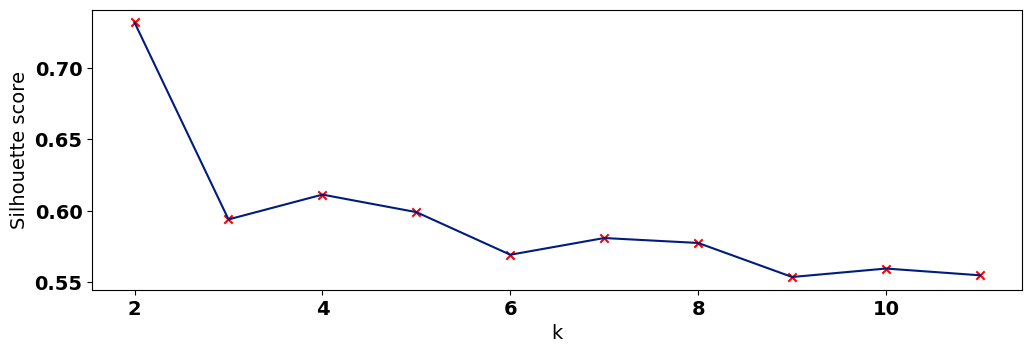

In [122]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

model.fit(df)

labels = model.predict(df)

np.unique(labels, return_counts=True)

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouettes = []
ks = list(range(2, 12))
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('Silhouette score');

from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(df)
labels = model.predict(df)
import numpy as np
np.unique(labels, return_counts=True)


##Decision trees

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      2077
           1       0.93      0.96      0.95      2385
           2       0.87      0.85      0.86      2115
           3       0.84      0.83      0.83      2117
           4       0.87      0.88      0.88      2004
           5       0.82      0.81      0.81      1900
           6       0.88      0.89      0.88      2045
           7       0.89      0.90      0.90      2189
           8       0.82      0.81      0.82      2042
           9       0.83      0.83      0.83      2126

    accuracy                           0.87     21000
   macro avg       0.87      0.87      0.87     21000
weighted avg       0.87      0.87      0.87     21000

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2077
           1       0.98      0.99      0.99      2385
           2       0.96      0.97      0.97      2115
           3       0.96 

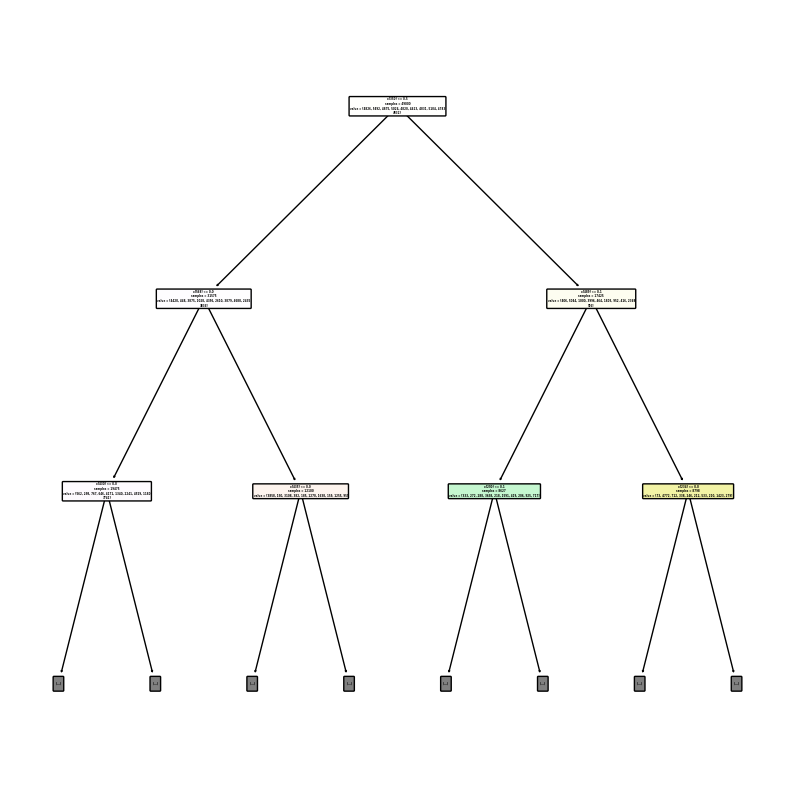

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()

decisiontree.fit(X_train, y_train)
randomforest.fit(X_train, y_train)

decisiontree_pred = decisiontree.predict(X_test)
randomforest_pred = randomforest.predict(X_test)

print(classification_report(y_test, decisiontree_pred))

print(classification_report(y_test, randomforest_pred))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plot_tree(decisiontree,
          max_depth=2,
          #feature_names=X.columns,
          filled=True,
          impurity=False,
          rounded=True,
          precision=1)

plt.show()



#Regularization

In [95]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=0.05)

linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)

linear_pred = linear_reg.predict(X_test)
ridge_pred = ridge_reg.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print(f"MSE without Ridge: {linear_mse}")
print(f"MSE with Ridge : {ridge_mse}")



MSE without Ridge: 40774775.45701215
MSE with Ridge : 40776398.22316088


##Neural networks


In [ ]:
from sklearn.datasets import fetch_openml #dataseti değiştir!!!!
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

data = pd.DataFrame(X)
data.insert(784, "label", y)

data.head()

X_train[2]

import matplotlib.pyplot as plt
for i in range(5):
  plt.imshow(X[i].reshape((28, 28)), cmap='gray')
  plt.show()

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=1, activation = "logistic")
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation = "logistic")
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation = "logistic")

mlp.fit(X_train, y_train)
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

predictions_NN = mlp.predict(X_test)
predictions_NN

predictions_NN1 = mlp1.predict(X_test)
predictions_NN1

predictions_NN2 = mlp2.predict(X_test)
predictions_NN2

print(f"Actual Value: {y_test[0]}")
print(f"Predicted Value: {predictions_NN2[0]}")


plt.imshow(X_test[0].reshape((28, 28)), cmap='gray')
plt.show()

print(f"Actual Value: {y_test[1]}")
print(f"Predicted Value For 1 Hidden Layer: {predictions_NN[1]}")
print(f"Predicted Value For 100 Hidden Layer: {predictions_NN1[1]}")
print(f"Predicted Value For 1000 Hidden Layer: {predictions_NN2[1]}")


plt.imshow(X_test[1].reshape((28, 28)), cmap='gray')
plt.show()

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions_NN)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_NN))

confusion_matrix(y_test, predictions_NN1)
print(classification_report(y_test,predictions_NN1))

confusion_matrix(y_test, predictions_NN2)
print(classification_report(y_test,predictions_NN2))


